<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера 0</b></font>

Привет, Татьяна! Спасибо, что прислала задание:) Меня зовут Слепцов Артем и я буду проверять твой проект) К сожалению, я не могу запустить твой проект полностью из-за ошибки в коде. По правилам я должен вернуть тебе проект. Как исправишь помарку, присылай работу снова. Буду ждать :)
</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Привет! Спасибо, что исправила задание:) Ты проделала большую работу над проектом, однако его еще можно улучшить. Будет здорово, если ты, надеюсь, не против, если я буду на ты, будешь отвечать на комментарии и участвовать в диалоге. 

Мои комментарии обозначены пометкой **Комментарий ревьюера**. Далее в файле ты сможешь найти их в похожих ячейках (если фон комментария <font color=green>зелёный</font> - всё сделано правильно. Рекомендации укажу таким же цветом; <font color=orange>оранжевый</font> - некритичные замечания. Если таких замечаний меньше трех - проект может быть принят без их отработки; <font color=red>красный</font> - нужно переделать). Не удаляй эти комментарии и постарайся учесть их в ходе выполнения данного проекта. 
</div>

## Сборный проект - 1

## <a id='sec'> Содержание: </a>
1. [Описание проекта](#sec1)
2. [Описание данных](#sec2)
3. [Первый взгляд на данные](#sec3)
4. [Предобработка](#sec4)

   4.1. [Приведение столбца year_of_release к типу int64](#sec41)
   
   4.2. [Приведение столбца user_score к типу float64](#sec42)
   
   4.3. [Работа с пропущенными значениями](#sec43)
   
   4.4. [Подсчет суммарных продажи во всех регионах и их запись в отдельный столбец total_sales](#sec44)
   
5. [Исследовательский анализ данных](#sec5)
6. [Портрет пользователя каждого региона](#sec6)
7. [Исследование статистических показателей](#sec7)
8. [Проверка гипотез](#sec8)
9. [Общий вывод](#sec9)

   9.1. [Выявленные закономерности](#sec91)
   
   9.2. [Планирование рекламных кампаний на будущее](#sec92)

### <a id='sec1'> Описание проекта </a>
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 

**Задача:** Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Не важно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

[вернуться в содержание](#sec)

### <a id='sec2'> Описание данных games.csv </a>
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы долларов)
* EU_sales — продажи в Европе (миллионы долларов)
* JP_sales — продажи в Японии (миллионы долларов)
* Other_sales — продажи в других странах (миллионы долларов)
* Critic_Score — оценка критиков (от 0 до 100)
* User_Score — оценка пользователей (от 0 до 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

**Обозначения для рейтинга:**
* **«EC»** («Early childhood») — «Для детей младшего возраста»
* **«E»** («Everyone») — «Для всех» *(первоначально **«K-A»** («Kids to Adults»))*
* **«E10+»** («Everyone 10 and older») — «Для всех от 10 лет и старше»
* **«T»** («Teen») — «Подросткам»
* **«M»** («Mature») — «Для взрослых»
* **«AO»** («Adults Only 18+») — «Только для взрослых»
* **«RP»** («Rating Pending») — «Рейтинг ожидается»

Данные за 2016 год могут быть неполными.

[вернуться в содержание](#sec)

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Вступление в работу очень важно. Так ты поясняешь то, чему она посвящена. Цель работы также хорошо бы вынести в отдельный блок вступления. Еще лучше будет, если ты сделаешь план работы с гиперссылками. Да, есть плагин ToC. Но хорошо бы уметь реализовывать интерактивный план проекта вручную. Как это реализовать - смотри по [ссылке](https://stackoverflow.com/questions/49535664/how-to-hyperlink-in-a-jupyter-notebook/49717704).

</div>

<div class="alert alert-info" role="alert">
  Постаралась выполнить, добавив также возможность возврата к содержанию проекта.
</div>

### <a id='sec3'> Первый взгляд на данные </a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sps
from IPython.display import display

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Правильно, что весь импорт ты проводишь в первой ячейке работы. Так твой коллега, запускающий работу, будет в курсе используемых в ней библиотек и сможет при необходимости быстро настроить окружение. 

</div>

In [2]:
#path = '/datasets/games.csv'
path = '~/Downloads/games.csv'
df = pd.read_csv(path)

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>

Путь все же стоило поменять для того, чтобы я мог запустить твой проект без изменений кода. 

</div>

<div class="alert alert-info" role="alert">
  Мне казалось, я в исправленной версии путь все же исправила на тот, что на локальном сервере используется. На всякий случай в комментариях оба пути (мой локальный и тот, что на сервере).
</div>

In [3]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Вывод:** для начала требуется переименование столбцов для удобства, а также приведение некоторых столбцов к нужным типам данных. Ко всему прочему нужно разобраться с тем, какие есть пропуски данных, какие можно удалить, заменить на какие-либо другие значения и прочее.

К примеру, можно заметить 2 пропуска в столбцах *Name*, *Genre* - возможно, это случайные пропуски, возникшие по ошибке.

Столбец *Year_of_Release* тоже требует работы с пропусками - здесь, скорее всего, пропуск может быть по причине того, что год выпуска просто еще не известен, будет определен позднее и затем занесен в базу, либо же год не известен, так как, к примеру, данные заполнялись довольно давно, и точной информации предоставлено не было.

Много пропусков в столбцах с пользовательскими оценками (*User_Score*) и с оценками критиков (*Critic_Score*). Возможно, они возникли из-за того, что некоторые пользователи и критики решили не оставлять свой отзыв играм. Кроме всего прочего в столбце *User_Score* содержатся данные типа *object*, а значит, пропуски могут быть не только типа *None*, но и какие-то строковые значения.

Столбец *Rating* содержит множество пропущенных значений - они могли возникнуть из-за не определенного для некоторых игр рейтинга.

[вернуться в содержание](#sec)

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Подумай также о возможных причинах появления пропусков, а также о том, являются ли они случайными или нет. Можно высказать предварительные варианты их обработки. 

Первый взгляд на таблицу выполнен.

</div>

<div class="alert alert-info" role="alert">
  Постаралась дополнить вывод возможными доводами о пропусках в данных.
</div>

### <a id='sec4'> Предобработка </a>

In [5]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [6]:
# привели названия столбцовк нижнему регистру, с пробелами и подчеркиваниями проблем не было
df.rename(columns=lambda c: c.lower(), inplace=True)

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Данный метод позволяет нам автоматизировать процесс приведения названий столбцов к нижнему регистру. Так исключается вероятность опечаток. 

</div>

In [7]:
# количество пропущенных значений
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [8]:
# количество дубликатов
df.duplicated().sum()

0

In [9]:
# смотрим, какие типы данных требуют замены
df.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

**Вывод:** столбец *year_of_release* требует приведения к типу *int64*, так как год не может быть нецелым. Приводить можно и к *datetime64*, но в данном случае это не так важно, так как дан только лишь год, а не вся дата целиком, а сравнивать года между собой позволяет и *int64*. Также требуется привести стобец *user_score* к типу *float64* аналогично похожей метрике - *critic_score*, имеющей как раз этот тип (оценка может быть нецелой). 

[вернуться в содержание](#sec)

#### <a id='sec41'> Приведение столбца *year_of_release* к типу *int64* </a>

Столбец имеет сейчас тип *float64*, а значит, в нем содержатся данные, обладающие типом *None*, следовательно, нужно эти пустые значения обработать.

In [10]:
# отберем те строки, где год не указан
df[df['year_of_release'].isna() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [11]:
# количество пустых значений в столбце year_of_release
df['year_of_release'].isna().sum()

269

У некоторых в названии год указан, а год релиза нет. Возможно, игры просто не были выпущены, к примеру, или еще не появились в принципе.  Выделим их из общей массы, заменив *None* на 1000.

In [12]:
df['year_of_release'] = df['year_of_release'].replace(np.nan, 1000)

In [13]:
# проверяем успешность замены пустых значений
df['year_of_release'].isna().sum()

0

In [14]:
# приводим столбец year_of_release к типу int64
df['year_of_release'] = df['year_of_release'].astype('int64')

In [15]:
# проверяем успешность замены типа
df.dtypes

name                object
platform            object
year_of_release      int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

[вернуться в содержание](#sec)

#### <a id='sec42'> Приведение столбца *user_score* к типу *float64* </a>

Для начала заметим, что этот столбец изначально имеет тип *object*,  что говорит о том, что есть какие-то пропущенные значения в строковом формате, а не просто какие-то значения типа *None* (потому что в таком бы случае столбец имел бы тип *float64*). 

Поэтому перед работой с типом данных, нужно понять, что это за строковые пропущенные значения, какой смысл они несут в себе.

In [16]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Итак, нашли уникальное пропущенное строковое значение *tbd*, помимо обычного *None*, которое на языке геймеров может интерпретироваться как  *To Be Determined - будет определено в будущем).*

In [17]:
# количество строк в столбце user_score со значением tbd
df[df['user_score'] == 'tbd'].shape[0]

2424

In [18]:
# общее число строк в user_score
df['user_score'].shape[0]

16715

In [19]:
# количество строк в user_score со значением None
df['user_score'].isna().sum()

6701

In [20]:
# общее число пустых значений
df[df['user_score'] == 'tbd'].shape[0] + \
df['user_score'].isna().sum()

9125

Заменим *tbd* на *None*, чтобы привести к *float64*. Если поменяем на 0, то исказим данные, так как рейтинг 0 существует.

In [21]:
# заменяем tbd на None
df['user_score'] = df['user_score'].replace('tbd', np.nan)

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Верно, по своей сути tbd и является Nan. Отлично, что определяешь неявные пропущенные значения.

</div>

In [22]:
# проверяем, равняется ли число пустых значений тому значению, что получили до этого, сложив количество tbd и None
df['user_score'].isna().sum() 

9125

In [23]:
# приводим столбец user_score к типу float64
df['user_score'] = df['user_score'].astype('float64')

In [24]:
# проверяем успешность замены типа
df.dtypes

name                object
platform            object
year_of_release      int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

Типы преобразовали, поработали с пропусками в двух столбцах, теперь работаем с пропусками в остальном массиве данных.

[вернуться в содержание](#sec)

#### <a id='sec43'> Работа с пропущенными значениями </a>

In [25]:
# количество оставшихся пропусков
df.isna().sum()

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

Начнем со столбцов *name* и *genre*, так как в них наименьшее число пропущенных данных.

In [26]:
df[df['name'].isna() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [27]:
df[df['genre'].isna() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Тут всего 2 строки в обоих случаях (причем одинаковых), информации особо весомой не наблюдается, так что можно удалить. На общий массив данных это вряд ли окажет значительное влияние.

In [28]:
# удаляем строки из соответствующих столбцов
df.dropna(subset=['name', 'genre'], inplace=True)

In [29]:
# смотрим на пропуски в оставшихся столбцах
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating             6764
dtype: int64

Пропусков много в оценках (как пользовательских, так и в оценках критиков) и в рейтинге. Скорее всего, людей просили заполнить эти данные, но они по каким-то причинам решили этого не делать (забыли/не захотели). Возможно, просто их ответ не был задокументирован в базах данных (релевантно для тех лет, когда не особо были распространены технологии).

Начнем с рейтинга.

In [30]:
df.rating.unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Вспомним из описания датасета.

**Обозначения для рейтинга:**
* **«EC»** («Early childhood») — «Для детей младшего возраста»
* **«E»** («Everyone») — «Для всех» *(первоначально **«K-A»** («Kids to Adults»))*
* **«E10+»** («Everyone 10 and older») — «Для всех от 10 лет и старше»
* **«T»** («Teen») — «Подросткам»
* **«M»** («Mature») — «Для взрослых»
* **«AO»** («Adults Only 18+») — «Только для взрослых»
* **«RP»** («Rating Pending») — «Рейтинг ожидается»

In [31]:
# соотношение значений для различных рейтингов
df['rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: rating, dtype: int64

In [32]:
# пропуски есть как в старых играх, так и в новых
df[df['rating'].isna() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [33]:
# посмотрим на строки со значениями RP, на это значение потенциально можно будет заменить пропуски
df[df['rating'] == 'RP']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
13672,Clockwork Empires,PC,1000,Strategy,0.0,0.04,0.0,0.00,58.0,3.8,RP
14270,Supreme Ruler: Cold War,PC,2011,Strategy,0.0,0.03,0.0,0.01,63.0,6.8,RP
16180,WRC: FIA World Rally Championship,PC,1000,Racing,0.0,0.01,0.0,0.00,65.0,NaN,RP


Видим здесь 2011 год (то есть не особо новые данные имеют такой рейтинг, получается, все пропуски могут тоже обладать им), значит, пропуски можем заменить на *RP (Rating Pending, то есть Рейтинг Ожидается)*.

In [34]:
# заменяем None в столбце rating на RP
df['rating'].fillna('RP', inplace=True)

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Пропуски лучше заполнять методом fillna. 

</div>

<div class="alert alert-info" role="alert">
  Поправила.
</div>

In [35]:
# смотрим на пропуски в оставшихся столбцах
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating                0
dtype: int64

Оценки трогать не будем, так как изменение ни к чему существенно не приведет. Тип *float64* они и так имеют, то есть строковых *None* мы не найдем там, а присвоение какого-то особого значения вместо нана избыточно, наверное.

[вернуться в содержание](#sec)

#### <a id='sec44'> Подсчет суммарных продажи во всех регионах и их запись в отдельный столбец *total_sales* </a>

In [36]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [37]:
# окончательно проверим датасет после предобработки
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,RP,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,RP,31.38


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16713 non-null int64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             16713 non-null object
total_sales        16713 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.7+ MB


[вернуться в содержание](#sec)

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Да, восстановить пропущенные значения мы не можем. Данных для этого недостаточно. Лучше работать с меньшим количеством данных хорошего качества.
    
Ошибки в данных устранены. Данные подготовлены к дальнейшему анализу. 

</div>

### <a id='sec5'> Исследовательский анализ данных </a>

#### Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [39]:
games_by_year = df.pivot_table(index='year_of_release',
                                     values='name',
                                     aggfunc='count')\
                  .rename(columns={'name': 'games_number'})\
                  .reset_index()

In [40]:
games_by_year.head()

,year_of_release,games_number
0,1000,269
1,1980,9
2,1981,46
3,1982,36
4,1983,17


In [41]:
games_by_year.describe()

,year_of_release,games_number
count,38.000000,38.000000
mean,1971.736842,439.815789
std,162.248672,446.367916
min,1000.000000,9.000000
25%,1988.250000,37.250000
50%,1997.500000,313.500000
75%,2006.750000,734.750000
max,2016.000000,1427.000000


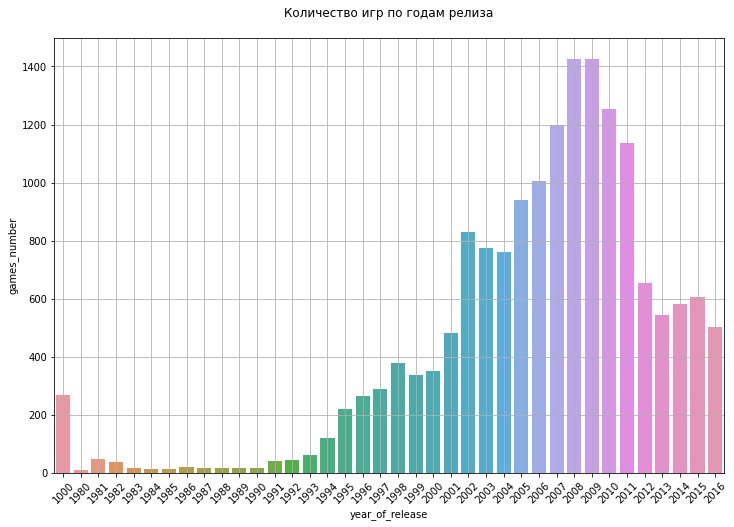

In [42]:
plt.figure(figsize=(12, 8))
sns.barplot(x='year_of_release', 
            y='games_number', 
            data=games_by_year)
plt.xticks(rotation=45)
plt.title('Количество игр по годам релиза\n')
plt.grid()

**Вывод:** в 2008-2009 годах наблюдается пик выпуска игр (выпущено 1427 игр). Игровая индустрия начинает активно развиваться примерно с 1995-1996 годов. Данные до этого периода времени, скорее всего, не так важны для анализа, так как интерес к играм в то время был не таким значительным. Игры с пропущенным годом выпуска можно также не брать во внимание, так как существенно не влияет на основные тенденции. Данные не слишком симметричны, наблюдается ассиметрия вправо. Ко всему прочему можно заметить некоторый спад количества игр после 2009 года. Можно предположить, что связано это с тем, что разработчики игр в последнее время не стремятся создавать множество новых игр, а стараются существенно дорабатывать уже существующие, которые пользуются большим успехом. Время идет, усовершенствуется графика, приемы, методы и средства разработки игр, так что старые игры нужнаются в развитии и модернизации, чем разработчики, скорее всего, в настоящее время и занимаются.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Как думаешь, с чем связан спад в индустрии последнего времени?

</div>

<div class="alert alert-info" role="alert">
  Добавила свои предположения.
</div>

#### Посмотрите, как менялись продажи по платформам. 

In [43]:
sales_by_platform = df.pivot_table(index='platform',
                                     values='total_sales',
                                     aggfunc='sum')\
                       .reset_index()\
                       .sort_values('total_sales', ascending=False)

In [44]:
sales_by_platform.head()

,platform,total_sales
16,PS2,1255.77
28,X360,971.42
17,PS3,939.65
26,Wii,907.51
4,DS,806.12


In [45]:
sales_by_platform.describe()

,total_sales
count,31.000000
mean,287.525484
std,348.220029
min,0.030000
25%,22.150000
50%,200.040000
75%,304.095000
max,1255.770000


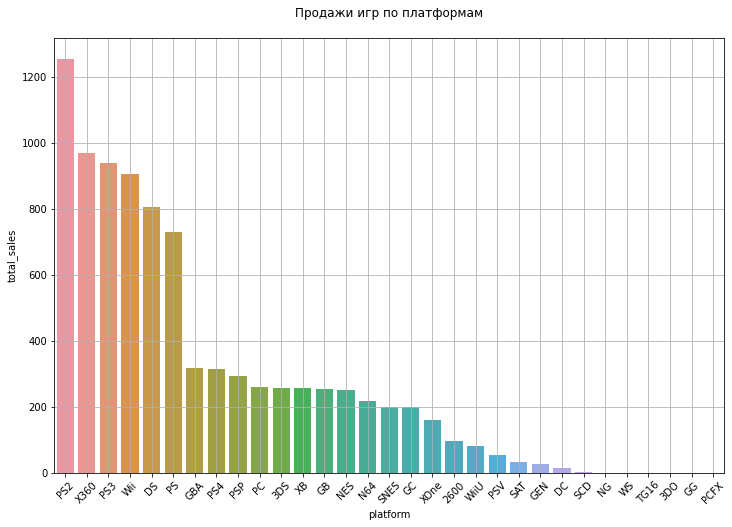

In [46]:
plt.figure(figsize=(12, 8))
sns.barplot(x='platform', 
            y='total_sales', 
            data=sales_by_platform)
plt.xticks(rotation=45)
plt.title('Продажи игр по платформам\n')
plt.grid()

#### Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. Найдите популярные в прошлом платформы, у которых сейчас продажи на нуле. За какой характерный период появляются новые и исчезают старые платформы?

In [47]:
top5_sales_by_platform = sales_by_platform.head()
top5_sales_by_platform

,platform,total_sales
16,PS2,1255.77
28,X360,971.42
17,PS3,939.65
26,Wii,907.51
4,DS,806.12


**Вывод:** самой популярной игровой платформой является *PS2*, ближайшие конкуренты отстают по суммарным продажам более чем на 200 млн. долларов.

In [48]:
sales_by_platform_by_year = df.query('platform in @top5_sales_by_platform.platform')\
                              .pivot_table(index='year_of_release',
                                           columns='platform',
                                           values='total_sales',
                                           aggfunc='sum')

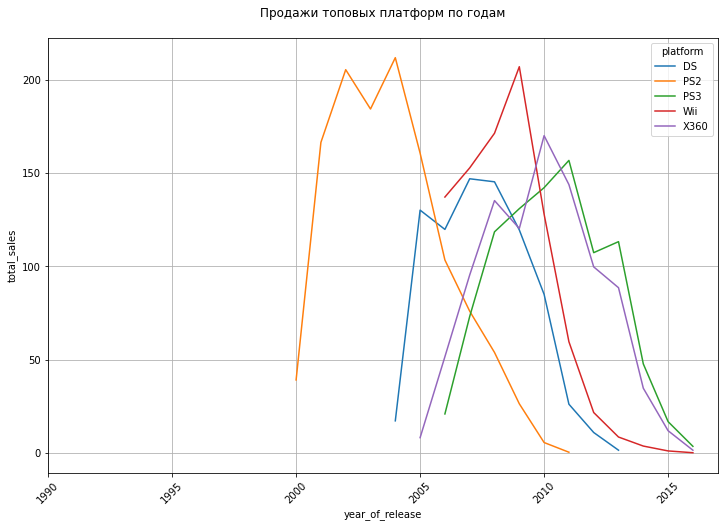

In [49]:
sales_by_platform_by_year.plot(figsize=(12, 8))
plt.xlim([1990, 2017])
plt.xticks(rotation=45)   
plt.title('Продажи топовых платформ по годам\n')
plt.ylabel('total_sales')
plt.grid()

**Вывод:** можно заметить, что у топ-5 популярных платформ период популярности составляет приблизительно 10-12 лет.

Так, например, 
* у стабильной на момент 2005 года *Wii* вышел ее срок к 2015 году;
* *PS2*, наиболее популярная платформа из всех, начала свой рост с 2000 года, но ее популярность практически упала уже к 2010;
* платформы *X360, PS3, DS*, начавшие свой рост примерно в одно и то же время, в 2004-2006 годах, показали упадок популярности к 2015-2016 году.

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>

Значение средней продолжительности существования платформы приведено. Однако выводы ты делаешь по графику. Стоит также привести расчет данного значения. Подумай, стоит ли включать в расчет все платформы. Будут ли выбросы по продолжительности существования платформ?

</div>

#### Определите, данные за какой период нужно взять, чтобы исключить значимое искажение распределения по платформам в 2016 году.

In [50]:
df.query('year_of_release == 2016')\
  .pivot_table(index='platform',
               values='total_sales',
               aggfunc='sum')\
  .reset_index()\
  .sort_values('total_sales', ascending=False)

,platform,total_sales
3,PS4,69.25
8,XOne,26.15
0,3DS,15.14
1,PC,5.25
6,WiiU,4.60
4,PSV,4.25
2,PS3,3.60
7,X360,1.52
5,Wii,0.18


**Вывод:** Скорее всего, те платформы, что в 2016 году показывают нулевые продажи, оказывают значимое искажение распределения по платформам, поэтому период времени для анализа, как мы уже выяснили ранее, должен составлять 10 лет.

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

Актуальный период назван. Лучше его уменьшить. Также ты его не выделила. Сделай это и используй в дальнйешем анализе новый датафрейм по актуальным данным. Сейчас у тебя в периоде содержится 3 этапа развития индустрии: рост до 2008 года, пик 2008 и 2009 годов, а также сокращение рынка последних годов. Также большей части платформ уже нет в 2016 году, в построении прогноза на 2017 год они нам не помогут. При уменьшении периода в рассмотрение попадут только последние поколения платформ, а также будем рассматривать только конечный на данный момент интервал развития игровой индустрии. 

</div>

<div class="alert alert-info" role="alert">
  Возник вопрос, ответ на который не смогла нигде найти. Пробовала строить этот график различными способами, вот в данном случае не получилось, чтобы линии уходили влево, а не начинались с середины графика. Один раз удалось добиться, чтобы графики начинались из нуля, в данном случае - нет, но не знаю, как это здесь поправить. Или, в принципе, и так возможно оставить?
</div>

#### Далее работайте только с данными, которые вы определили. Не учитывайте данные за предыдущие годы.

In [51]:
sales_by_platform_by_year = df.pivot_table(index='year_of_release',
                                           columns='platform',
                                           values='total_sales',
                                           aggfunc='sum')

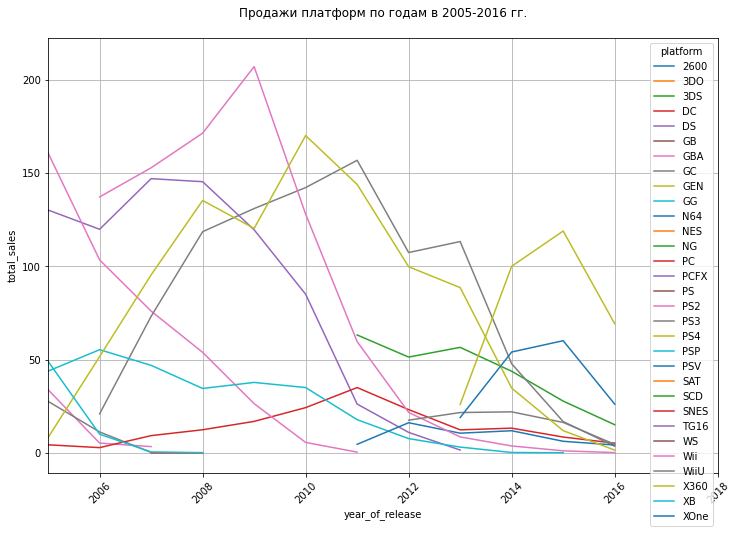

In [133]:
sales_by_platform_by_year.plot(figsize=(12, 8))
plt.xlim([2005, 2018])
plt.xticks(rotation=45)   
plt.title('Продажи платформ по годам в 2005-2016 гг.\n')
plt.ylabel('total_sales')
plt.grid()

#### Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

In [53]:
sales_by_platform_2016 = df.query('year_of_release == 2016')\
                                 .pivot_table(index='platform',
                                              values='total_sales',
                                              aggfunc='sum')\
                                 .reset_index()\
                                 .sort_values('total_sales', ascending=False)

In [54]:
sales_by_platform_2016

,platform,total_sales
3,PS4,69.25
8,XOne,26.15
0,3DS,15.14
1,PC,5.25
6,WiiU,4.60
4,PSV,4.25
2,PS3,3.60
7,X360,1.52
5,Wii,0.18


**Вывод:** можно выделить 3-х лидеров, растущих по продажам на момент 2016 года: *PS4, XOne, 3DS*. В ближайшие 10 лет ожидается период их популярности.

Что касается платформ, которые были популярны на момент 2005 года, то их продажи заметно низкие, пик их популярности уже позади.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Да, именно вышеназванные платформы мы и можем назвать перспективными на 2017 год. 

</div>

#### Постройте график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. Велика ли разница в продажах? А в средних продажах на разных платформах? Опишите результат.

In [55]:
top3_future_sales_by_platform = sales_by_platform_2016.head(3)
top3_future_sales_by_platform

,platform,total_sales
3,PS4,69.25
8,XOne,26.15
0,3DS,15.14


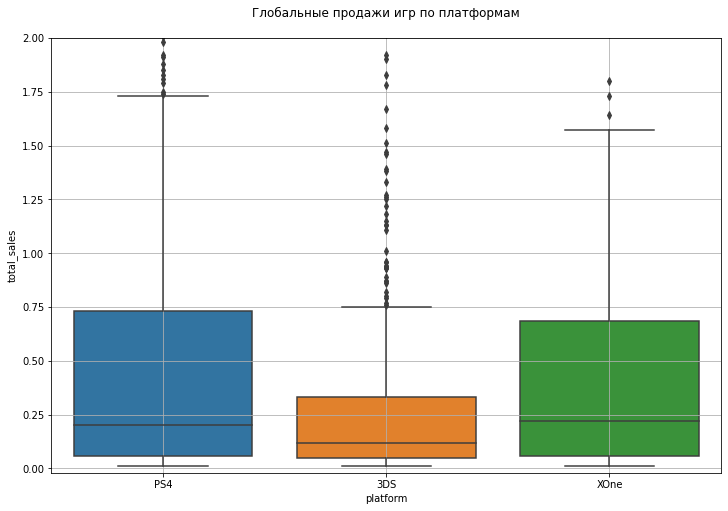

In [56]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='platform', 
            y='total_sales', 
            data=df.query('2005 <= year_of_release <= 2016 and\
                           platform in @top3_future_sales_by_platform.platform'))
plt.ylim(-0.02, 2)
plt.title('Глобальные продажи игр по платформам\n')
plt.grid()

In [57]:
# разница в средних продажах
for platform in top3_future_sales_by_platform.platform:
    print(f'{platform}:\n{df.query("platform == @platform and 2005 <= year_of_release <= 2016").total_sales.mean()}\n')

PS4:
0.8013775510204058

XOne:
0.6450202429149797

3DS:
0.5035351562499966



In [58]:
# разница в общих продажах
for platform in top3_future_sales_by_platform.platform:
    print(f'{platform}:\n{df.query("platform == @platform and 2005 <= year_of_release <= 2016").total_sales.sum()}\n')

PS4:
314.14

XOne:
159.32

3DS:
257.81



**Вывод:** наиболее высокая средняя сумма продаж наблюдается у платформы *PS4*, следом за ней идет *XOne*, также у них самый большой размах значений, самая низкая сумма - у *3DS*.

Медианные значения у всех трех платформ находятся примерно на одном уровне.

Наиболее высокая общая сумма продаж вновь у платформы *PS4*, но на 2-м месте располагается *3DS*.

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>
 
Подумай, из-за чего формируется разница между платформами. Старайся не только описывать результат, но и трактовать его. 

</div>

#### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы и соотнесите их с продажами игр на других платформах.

Проведем анализ для 3-х лидирующих на момент 2016 года платформ: *PS4, XOne, 3DS*.

In [59]:
ps4 = df.query('2005 <= year_of_release <= 2016 and\
                platform == "PS4"')[['total_sales', 'critic_score', 'user_score']]

xone = df.query('2005 <= year_of_release <= 2016 and\
                 platform == "XOne"')[['total_sales', 'critic_score', 'user_score']]

three_ds = df.query('2005 <= year_of_release <= 2016 and\
                     platform == "3DS"')[['total_sales', 'critic_score', 'user_score']]

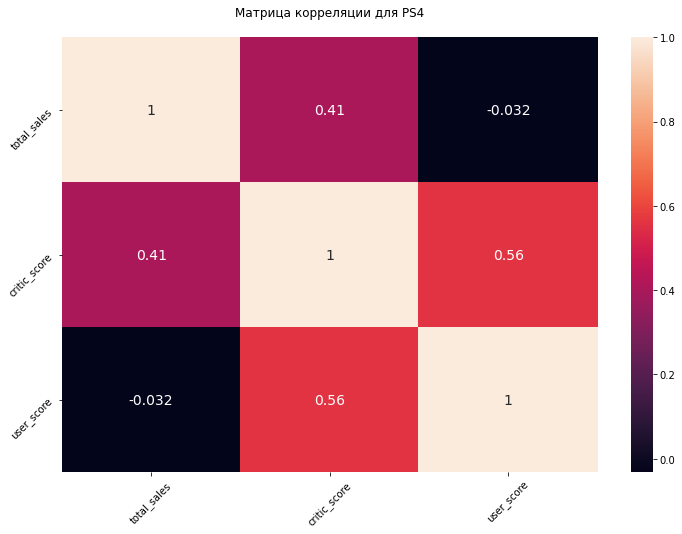

In [60]:
plt.figure(figsize=(12, 8))
sns.heatmap(ps4.corr(), 
            annot=True, 
            annot_kws={'fontsize': 14})
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title('Матрица корреляции для PS4\n');

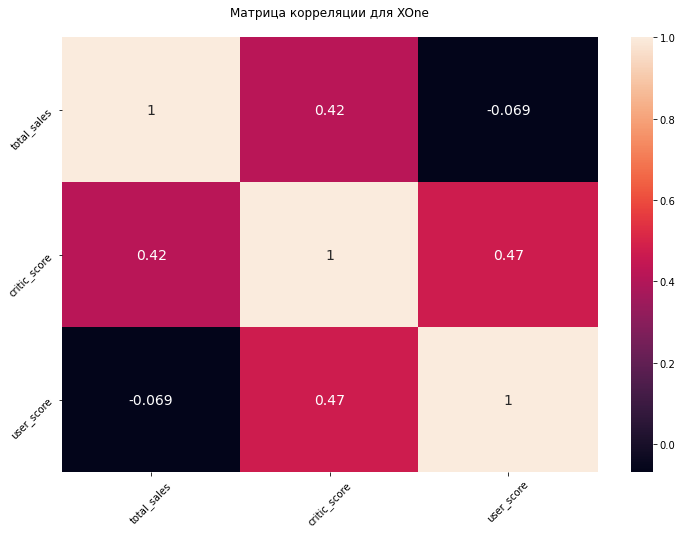

In [61]:
plt.figure(figsize=(12, 8))
sns.heatmap(xone.corr(), 
            annot=True, 
            annot_kws={'fontsize': 14})
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title('Матрица корреляции для XOne\n');

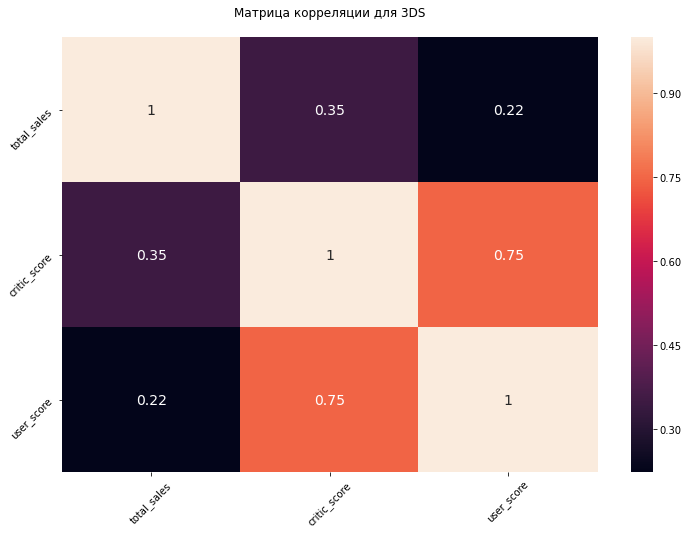

In [62]:
plt.figure(figsize=(12, 8))
sns.heatmap(three_ds.corr(), 
            annot=True, 
            annot_kws={'fontsize': 14})
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title('Матрица корреляции для 3DS\n');

In [63]:
# общая сводка по матрицам корреляции 
corr_ps4 = ps4.corr()
corr_xone = xone.corr()
corr_3ds = three_ds.corr()

print('PS4:')
display(corr_ps4)
print()
print('XOne:')
display(corr_xone)
print()
print('3DS:')
display(corr_3ds)

PS4:


,total_sales,critic_score,user_score
total_sales,1.000000,0.406568,-0.031957
critic_score,0.406568,1.000000,0.557654
user_score,-0.031957,0.557654,1.000000



XOne:


,total_sales,critic_score,user_score
total_sales,1.000000,0.416998,-0.068925
critic_score,0.416998,1.000000,0.472462
user_score,-0.068925,0.472462,1.000000



3DS:


,total_sales,critic_score,user_score
total_sales,1.000000,0.348740,0.222078
critic_score,0.348740,1.000000,0.745222
user_score,0.222078,0.745222,1.000000


<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>

Таблицы на печать выводи с помощью метода display. print переводит данные в строку, а нам этого не надо. 

</div>

<div class="alert alert-info" role="alert">
  Сделано.
</div>

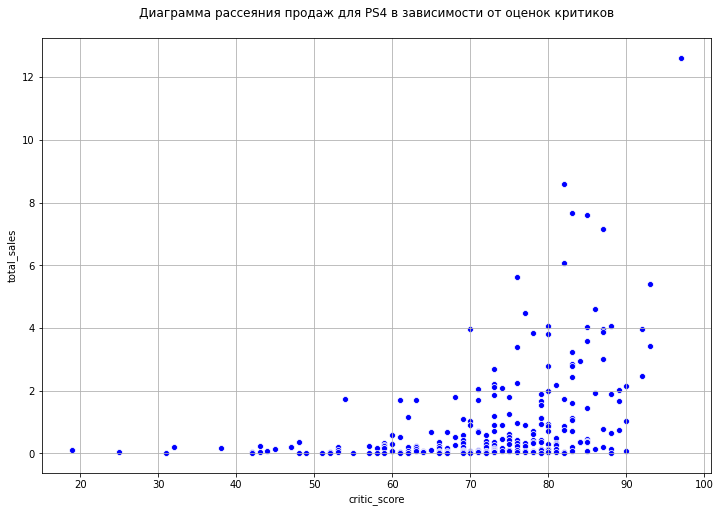

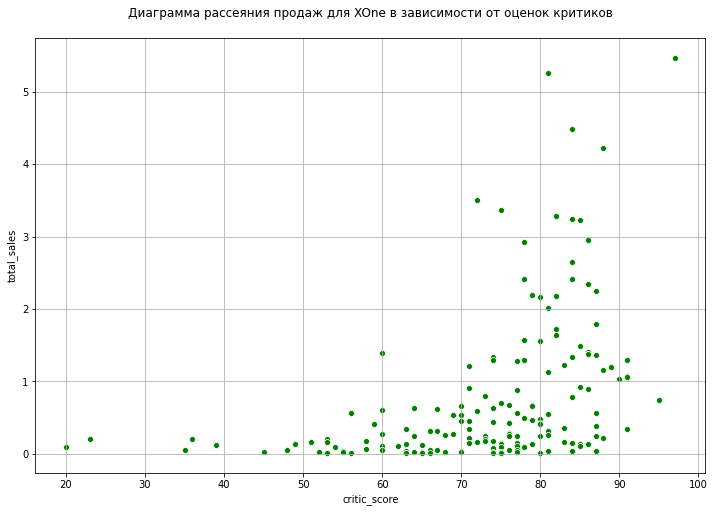

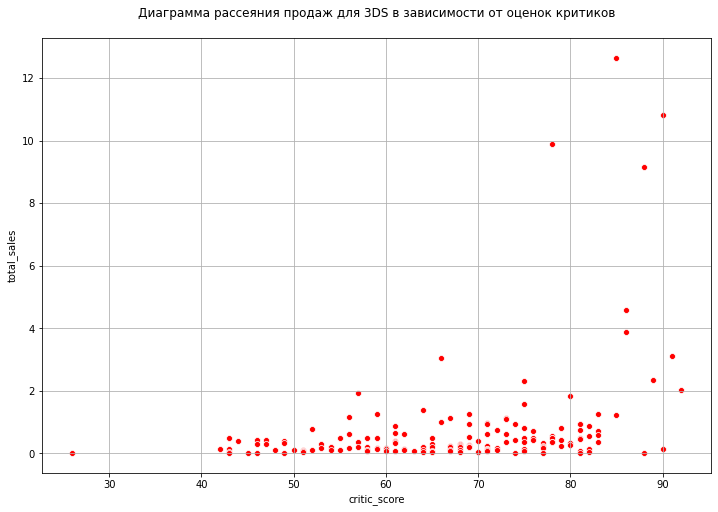

In [64]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='critic_score', 
                y='total_sales', 
                data=ps4, color='blue')
plt.title('Диаграмма рассеяния продаж для PS4 в зависимости от оценок критиков\n')
plt.grid()


plt.figure(figsize=(12, 8))
sns.scatterplot(x='critic_score', 
                y='total_sales', 
                data=xone, color='green')
plt.title('Диаграмма рассеяния продаж для XOne в зависимости от оценок критиков\n')
plt.grid()


plt.figure(figsize=(12, 8))
sns.scatterplot(x='critic_score', 
                y='total_sales', 
                data=three_ds, color='red')
plt.title('Диаграмма рассеяния продаж для 3DS в зависимости от оценок критиков\n')
plt.grid()

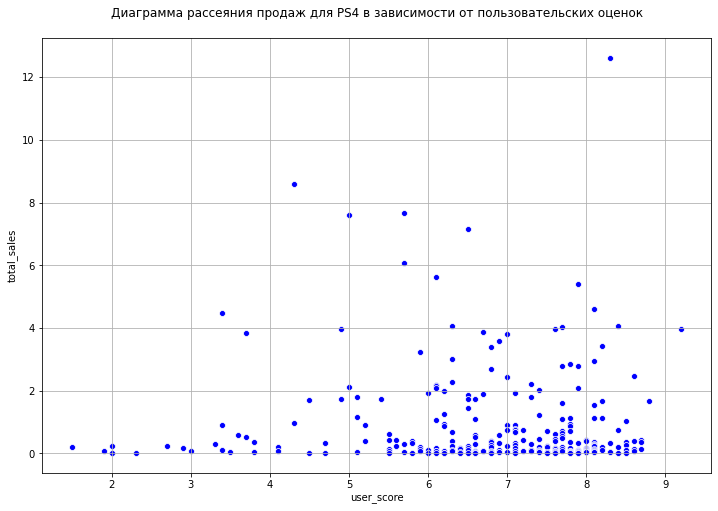

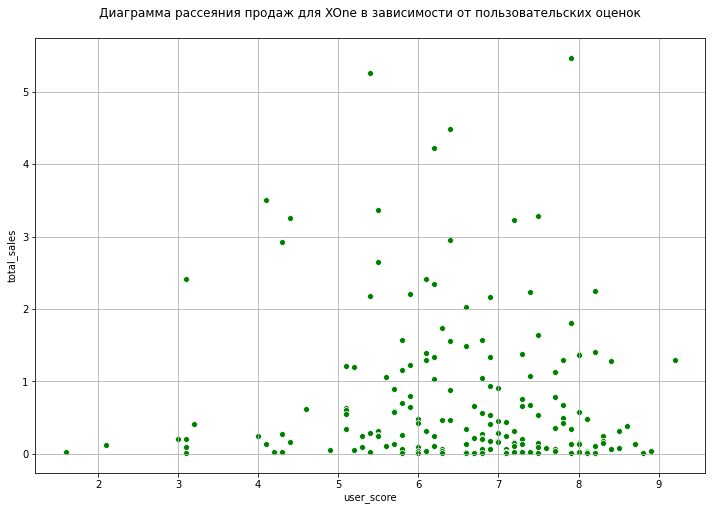

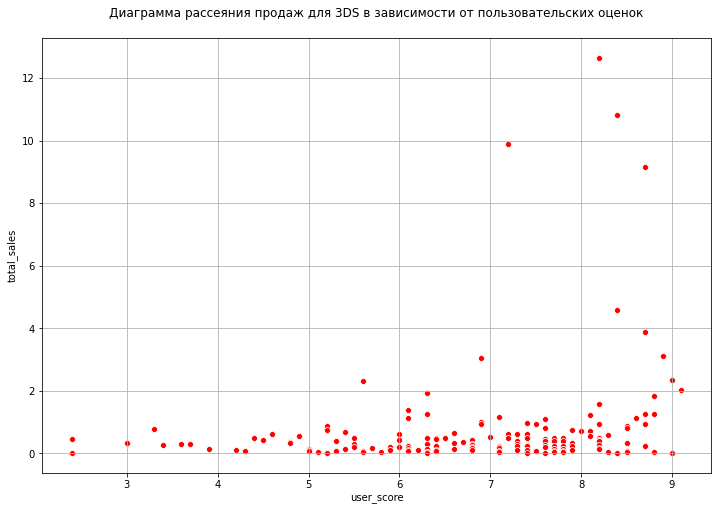

In [65]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='user_score', 
                y='total_sales', 
                data=ps4, color='blue')
plt.title('Диаграмма рассеяния продаж для PS4 в зависимости от пользовательских оценок\n')
plt.grid()

plt.figure(figsize=(12, 8))
sns.scatterplot(x='user_score', 
                y='total_sales', 
                data=xone, color='green')
plt.title('Диаграмма рассеяния продаж для XOne в зависимости от пользовательских оценок\n')
plt.grid()

plt.figure(figsize=(12, 8))
sns.scatterplot(x='user_score', 
                y='total_sales', 
                data=three_ds, color='red')
plt.title('Диаграмма рассеяния продаж для 3DS в зависимости от пользовательских оценок\n')
plt.grid()

**Вывод:** по графикам рассеяния и коэффициентам корреляции определим зависимость оценок критиков и пользователей от продаж в рамках определенной платформы. 

**Шкала Чеддока** (для характеристики степени тесноты связи):

* 0.1 - 0.3 - слабая 
* 0.3 - 0.5 - умеренная 
* 0.5 - 0.7 - заметная 
* 0.7 - 0.9 - высокая 
* 0.9 - 0.99 - сильная 
* 0.99 - 1 - функциональная 

Коэффициент корреляции Пирсона для *PS4*:
 * для оценок критиков: 0.41 $\Rightarrow$ умеренная положительная связь
 * для оценок пользователей: -0.03 $\Rightarrow$ отсутствие связи
 
Коэффициент корреляции Пирсона для *XOne*:
 * для оценок критиков: 0.42 $\Rightarrow$ умеренная положительная связь
 * для оценок пользователей: -0.07 $\Rightarrow$ отсутствие связи
 
Коэффициент корреляции Пирсона для *3DS*:
 * для оценок критиков: 0.35 $\Rightarrow$ умеренная положительная связь
 * для оценок пользователей: 0.22 $\Rightarrow$ умеренная положительная связь
 

*Примечание: помним, что коэффициент корреляции Пирсона оценивает лишь линейную связь переменных, не умея выявлять нелинейную связь (для таких случаев использовать нужно коэффициенты корреляции Кендалла и Спирмена, к примеру)*

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Результат получен. Подумай, чем он вызван. Здорово, что рассмотрены несколько платформ. 

</div>

#### Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [66]:
df.query('2005 <= year_of_release <= 2016')\
  .groupby('genre')\
  .agg({'name': 'count',
        'total_sales': 'sum'})\
  .rename(columns={'name': 'number_of_games'})\
  .reset_index()\
  .sort_values('total_sales', ascending=False)

,genre,number_of_games,total_sales
0,Action,2574,1202.04
10,Sports,1383,853.34
8,Shooter,833,758.56
3,Misc,1368,615.83
7,Role-Playing,1067,550.78
6,Racing,638,355.03
4,Platform,423,303.06
9,Simulation,644,269.62
2,Fighting,456,208.07
1,Adventure,1065,149.81


In [67]:
sales_by_genre = df.query('2005 <= year_of_release <= 2016')\
                   .groupby('genre')\
                   .agg({'name': 'count',
                         'total_sales': 'sum'})\
                   .rename(columns={'name': 'number_of_games'})\
                   .reset_index()

sales_by_genre['sales_coeff'] = sales_by_genre.total_sales / sales_by_genre.number_of_games
sales_by_genre.sort_values('sales_coeff', ascending=False, inplace=True)

In [68]:
sales_by_genre

,genre,number_of_games,total_sales,sales_coeff
8,Shooter,833,758.56,0.910636
4,Platform,423,303.06,0.716454
10,Sports,1383,853.34,0.617021
6,Racing,638,355.03,0.556473
7,Role-Playing,1067,550.78,0.516195
0,Action,2574,1202.04,0.466993
2,Fighting,456,208.07,0.456294
3,Misc,1368,615.83,0.450168
9,Simulation,644,269.62,0.418665
5,Puzzle,399,110.28,0.276391


**Вывод:** топ-3 жанра по общей сумме продаж - *Action, Sports, Shooter*.

Чтобы оценить, какие жанры самые прибыльные, недостаточно просто проранжировать по общей сумме продаж, гораздо лучше для этих целей посмотреть на относительную величину. По ней определяем, что топ-3 самых прибыльных жанров - *Shooter, Platform, Sports*. 

Наименее прибыльными жанрами (что по общей, что по относительной сумме продаж) являются *Puzzle, Strategy, Adventure*.

[вернуться в содержание](#sec)

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Анализ популярности жанров проведен. Однако не стоит забывать, что производство игр в жанрах Action или Shooter обходится сильно дороже, чем производство Puzzle-игр. 

</div>

### <a id='sec6'> Портрет пользователя каждого региона </a>

#### Определите для пользователя каждого региона (NA, EU, JP): 
#### Самые популярные платформы (топ-5). Опишите различия в долях продаж.

In [69]:
na_platform = df.query('na_sales > 0 and 2005 <= year_of_release <= 2016')\
                .groupby('platform')\
                .agg({'name': 'count',
                      'na_sales': 'sum'})\
                .rename(columns={'name': 'number_of_games'})\
                .reset_index()\
                .sort_values('na_sales', ascending=False)

In [70]:
eu_platform = df.query('eu_sales > 0 and 2005 <= year_of_release <= 2016')\
                .groupby('platform')\
                .agg({'name': 'count',
                      'eu_sales': 'sum'})\
                .rename(columns={'name': 'number_of_games'})\
                .reset_index()\
                .sort_values('eu_sales', ascending=False)

In [71]:
jp_platform = df.query('jp_sales > 0 and 2005 <= year_of_release <= 2016')\
                .groupby('platform')\
                .agg({'name': 'count',
                      'jp_sales': 'sum'})\
                .rename(columns={'name': 'number_of_games'})\
                .reset_index()\
                .sort_values('jp_sales', ascending=False)

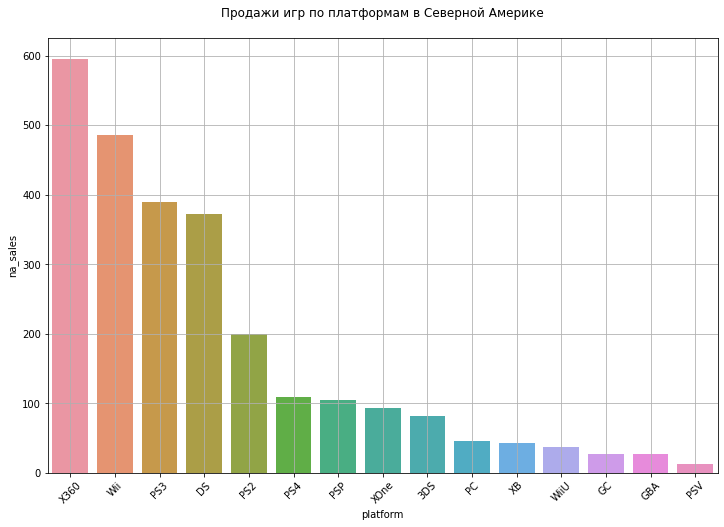

In [72]:
plt.figure(figsize=(12, 8))
sns.barplot(x='platform', 
            y='na_sales', 
            data=na_platform)
plt.xticks(rotation=45)
plt.title('Продажи игр по платформам в Северной Америке\n')
plt.grid()

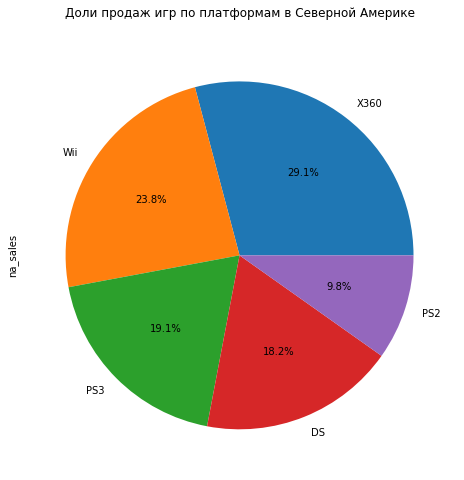

In [73]:
na_platform.head().plot(y='na_sales', 
                        kind='pie', 
                        labels=na_platform.platform,
                        autopct='%.1f%%',
                        figsize=(12, 8),
                        legend=False)
plt.title('Доли продаж игр по платформам в Северной Америке\n');

In [74]:
na_platform.head()

,platform,number_of_games,na_sales
12,X360,1120,595.74
10,Wii,1116,486.87
6,PS3,992,390.13
1,DS,1489,371.98
5,PS2,686,200.49


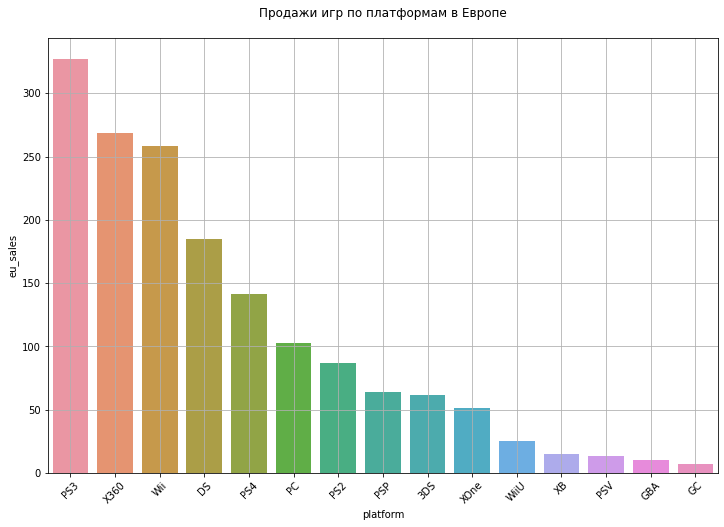

In [75]:
plt.figure(figsize=(12, 8))
sns.barplot(x='platform', 
            y='eu_sales', 
            data=eu_platform)
plt.xticks(rotation=45)
plt.title('Продажи игр по платформам в Европе\n')
plt.grid()

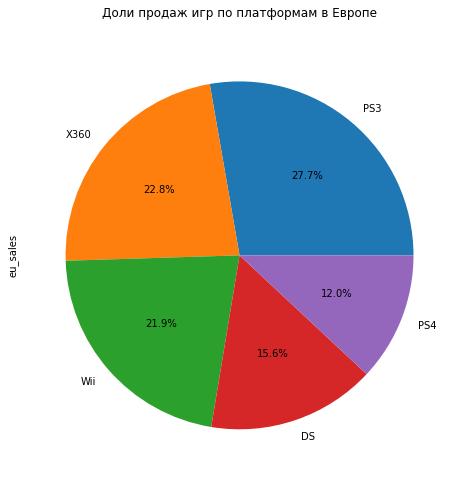

In [76]:
eu_platform.head().plot(y='eu_sales', 
                        kind='pie', 
                        labels=eu_platform.platform,
                        autopct='%.1f%%',
                        figsize=(12, 8),
                        legend=False)
plt.title('Доли продаж игр по платформам в Европе\n');

In [77]:
eu_platform.head()

,platform,number_of_games,eu_sales
6,PS3,946,327.21
12,X360,972,268.32
10,Wii,720,258.32
1,DS,751,184.48
7,PS4,290,141.09


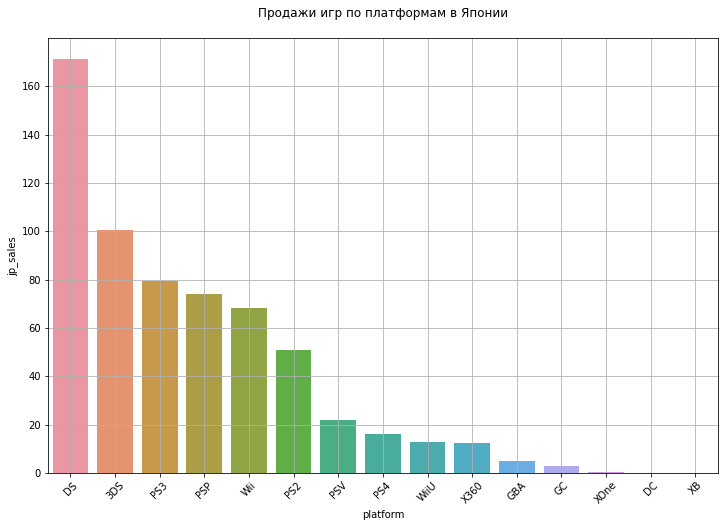

In [78]:
plt.figure(figsize=(12, 8))
sns.barplot(x='platform', 
            y='jp_sales', 
            data=jp_platform)
plt.xticks(rotation=45)
plt.title('Продажи игр по платформам в Японии\n')
plt.grid()

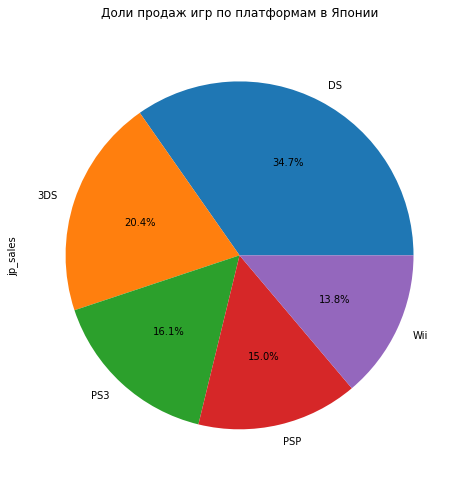

In [79]:
jp_platform.head().plot(y='jp_sales', 
                        kind='pie', 
                        labels=jp_platform.platform,
                        autopct='%.1f%%',
                        figsize=(12, 8),
                        legend=False)
plt.title('Доли продаж игр по платформам в Японии\n');

In [80]:
jp_platform.head()

,platform,number_of_games,jp_sales
2,DS,739,171.35
0,3DS,358,100.62
6,PS3,705,79.41
8,PSP,748,73.85
10,Wii,267,68.28


**Вывод:** 

Наиболее прибыльными платформами в Северной Америке являются: 
* *X360* (составляют 29.1% от топ-5 платформ), 
* *Wii* (23.8%), 
* *PS3* (19.1%), 
* *DS* (18.2%), 
* *PS2* (9.8%). 

Наиболее прибыльными платформами в Европе являются: 
* *PS3* (27.7%), 
* *X360* (22.8%), 
* *Wii* (21.9%), 
* *DS* (15.6%), 
* *PS4* (12.0%). 

Наиболее прибыльными платформами в Японии являются: 
* *DS* (34.7%), 
* *3DS* (20.4%), 
* *PS3* (16.1%), 
* *PSP* (15.0%), 
* *Wii* (13.8%). 

Из видимых различиях по продажам игр в разных регионах этого можно сделать вывод, что нужно ориентироваться на рынок внутри каждого отдельного региона в том числе, так как везде свои лидеры продаж. Но нужно отметить, что во все топ-5 входят платформы: *Wii, PS3, DS*.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>
 
Не советую использовать пироговые диаграммы (pie-charts). Такая диаграмма затрудняет понимание, особенно если сегментов будет больше 4х. Также, на этом типе диаграмм сложно визуально увидеть разницу между сегментами. Рекомендую использовать обычные столбчатые диаграммы вместо пироговых диаграмм, а доли продаж можно вывести для каждой платформы непосредственно над столбцом. 

</div>

#### Определите для пользователя каждого региона (NA, EU, JP):
#### Самые популярные жанры (топ-5). Поясните разницу.

In [81]:
na_genre = df.query('na_sales > 0 and 2005 <= year_of_release <= 2016')\
             .groupby('genre')\
             .agg({'name': 'count',
                   'na_sales': 'sum'})\
             .rename(columns={'name': 'number_of_games'})\
             .reset_index()\
             .sort_values('na_sales', ascending=False)

In [82]:
eu_genre = df.query('eu_sales > 0 and 2005 <= year_of_release <= 2016')\
             .groupby('genre')\
             .agg({'name': 'count',
                   'eu_sales': 'sum'})\
             .rename(columns={'name': 'number_of_games'})\
             .reset_index()\
             .sort_values('eu_sales', ascending=False)

In [83]:
jp_genre = df.query('jp_sales > 0 and 2005 <= year_of_release <= 2016')\
             .groupby('genre')\
             .agg({'name': 'count',
                   'jp_sales': 'sum'})\
             .rename(columns={'name': 'number_of_games'})\
             .reset_index()\
             .sort_values('jp_sales', ascending=False)

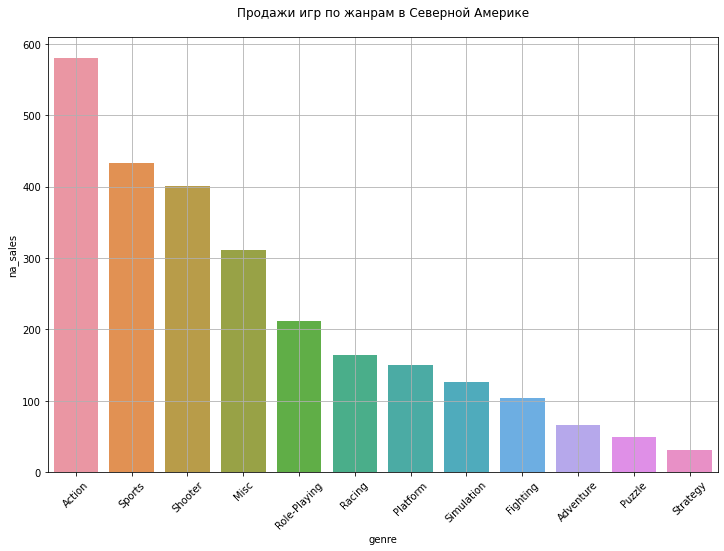

In [84]:
plt.figure(figsize=(12, 8))
sns.barplot(x='genre', 
            y='na_sales', 
            data=na_genre)
plt.xticks(rotation=45)
plt.title('Продажи игр по жанрам в Северной Америке\n')
plt.grid()

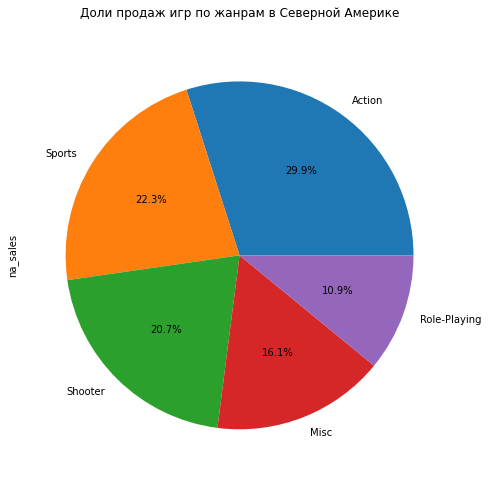

In [85]:
na_genre.head().plot(y='na_sales', 
                        kind='pie', 
                        labels=na_genre.genre,
                        autopct='%.1f%%',
                        figsize=(12, 8),
                        legend=False)
plt.title('Доли продаж игр по жанрам в Северной Америке\n');

In [86]:
na_genre.head()

,genre,number_of_games,na_sales
0,Action,1883,580.04
10,Sports,1085,432.70
8,Shooter,733,400.96
3,Misc,929,311.82
7,Role-Playing,616,211.85


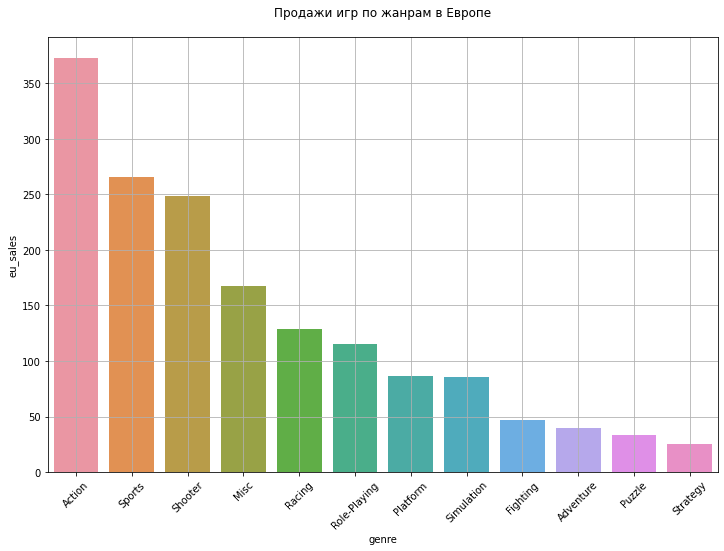

In [87]:
plt.figure(figsize=(12, 8))
sns.barplot(x='genre', 
            y='eu_sales', 
            data=eu_genre)
plt.xticks(rotation=45)
plt.title('Продажи игр по жанрам в Европе\n')
plt.grid()

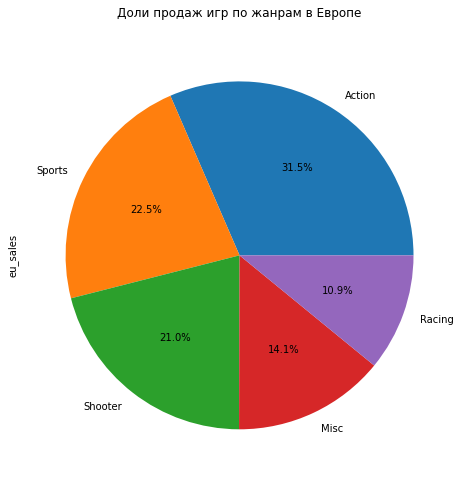

In [88]:
eu_genre.head().plot(y='eu_sales', 
                        kind='pie', 
                        labels=eu_genre.genre,
                        autopct='%.1f%%',
                        figsize=(12, 8),
                        legend=False)
plt.title('Доли продаж игр по жанрам в Европе\n');

In [89]:
eu_genre.head()

,genre,number_of_games,eu_sales
0,Action,1736,372.58
10,Sports,819,265.61
8,Shooter,667,248.07
3,Misc,677,167.09
6,Racing,481,129.05


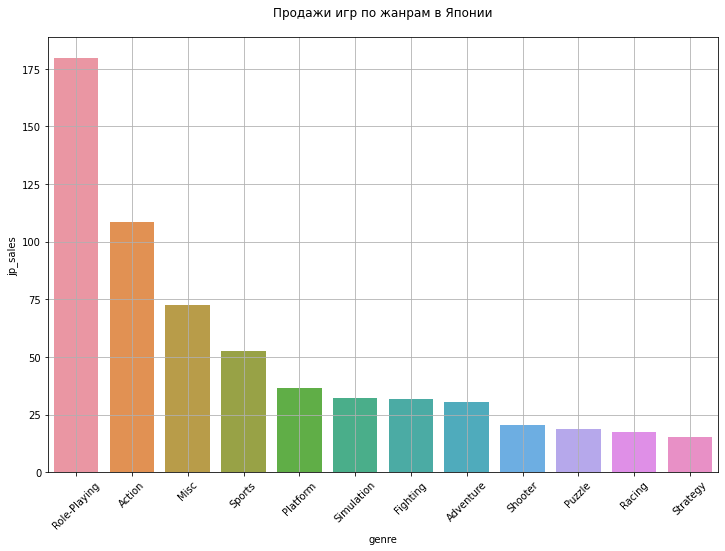

In [90]:
plt.figure(figsize=(12, 8))
sns.barplot(x='genre', 
            y='jp_sales', 
            data=jp_genre)
plt.xticks(rotation=45)
plt.title('Продажи игр по жанрам в Японии\n')
plt.grid()

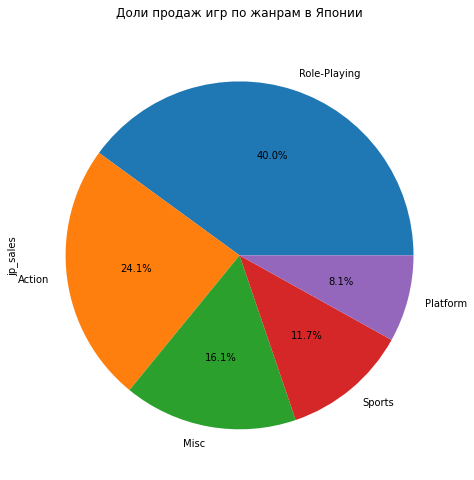

In [91]:
jp_genre.head().plot(y='jp_sales', 
                        kind='pie', 
                        labels=jp_genre.genre,
                        autopct='%.1f%%',
                        figsize=(12, 8),
                        legend=False)
plt.title('Доли продаж игр по жанрам в Японии\n');

In [92]:
jp_genre.head()

,genre,number_of_games,jp_sales
7,Role-Playing,786,179.60
0,Action,1012,108.39
3,Misc,422,72.49
10,Sports,341,52.51
4,Platform,112,36.32


**Вывод:** 

Наиболее популярными жанрами в Северной Америке являются: 
* Action (29.9%),
* Sports (22.3%), 
* Shooter (20.7%), 
* Misc (16.1%),
* Role-Playing (10.9%).

Наиболее популярными жанрами в Европе являются: 
* Action (31.5%), 
* Sports (22.5%), 
* Shooter (21.0%),
* Misc (14.1%),
* Racing (10.9%).

Наиболее популярными жанрами в Японии являются: 
* Role-Playing (40.0%), 
* Action (16.1%), 
* Misc (16.1%),
* Sports (11.7%), 
* Platform (8.1%).

Исходя из этих данных, можно сделать вывод, что рынок Северной Америки и Европы примерно похожи, за исключением того, что замыкают топ-5 в Северной Америке игры с жаром *Role-Playing*, а в Европе - *Racing*. В Японии распределение по жанрам несколько меняется: *Action* уходит на 2-й план, а 1-е место занимает с огромным отрывом *Role-Playing*. Японский рынок так сильно отличается от других из-за того, что он считается закрытым, сильно ориентированным на своих местных жителей. Таким образом, предпочтения по жанрам внутри каждого отдельного региона также стоит учитывать. Во все топ-5 по жанрам по попали: *Action, Sports, Misc*. 

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>
 
Из-за чего японский рынок игр так сильно отличается от других? 

</div>

<div class="alert alert-info" role="alert">
  Постаралась привести объяснение.
</div>

#### Определите для пользователя каждого региона (NA, EU, JP):
#### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [93]:
na_rating = df.query('na_sales > 0 and 2005 <= year_of_release <= 2016')\
              .groupby('rating')\
              .agg({'name': 'count',
                    'na_sales': 'sum'})\
              .rename(columns={'name': 'number_of_games'})\
              .reset_index()\
              .sort_values('na_sales', ascending=False)

In [94]:
eu_rating = df.query('eu_sales > 0 and 2005 <= year_of_release <= 2016')\
              .groupby('rating')\
              .agg({'name': 'count',
                    'eu_sales': 'sum'})\
              .rename(columns={'name': 'number_of_games'})\
              .reset_index()\
              .sort_values('eu_sales', ascending=False)

In [95]:
jp_rating = df.query('jp_sales > 0 and 2005 <= year_of_release <= 2016')\
            .groupby('rating')\
            .agg({'name': 'count',
                  'jp_sales': 'sum'})\
            .rename(columns={'name': 'number_of_games'})\
            .reset_index()\
            .sort_values('jp_sales', ascending=False)

In [96]:
na_rating

,rating,number_of_games,na_sales
1,E,2476,873.10
4,M,1114,607.34
6,T,1744,479.08
2,E10+,1293,343.02
5,RP,1246,323.49
3,EC,8,1.53
0,AO,1,1.26


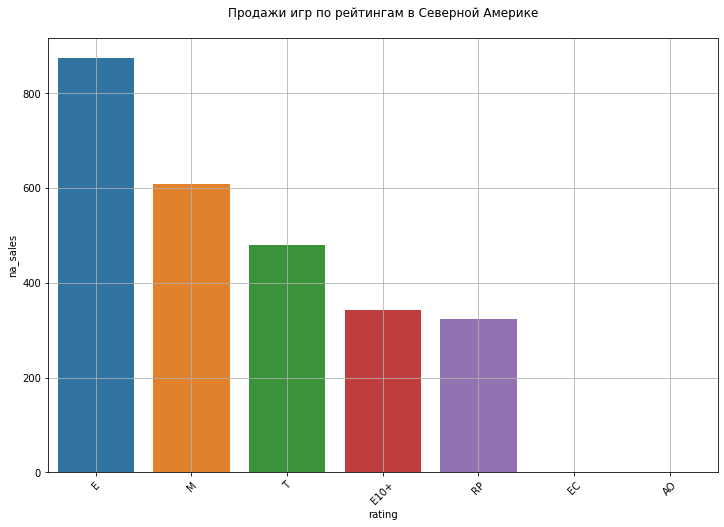

In [97]:
plt.figure(figsize=(12, 8))
sns.barplot(x='rating', 
            y='na_sales', 
            data=na_rating)
plt.xticks(rotation=45)
plt.title('Продажи игр по рейтингам в Северной Америке\n')
plt.grid()

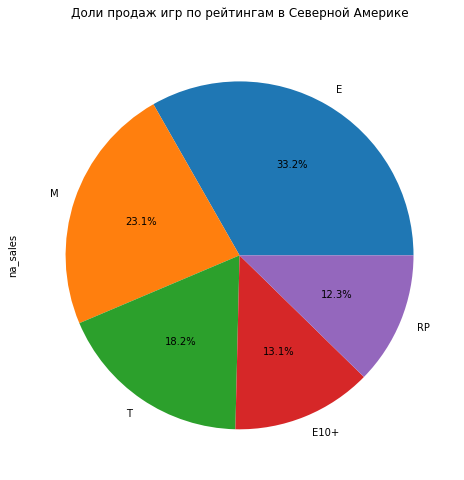

In [98]:
na_rating.head().plot(y='na_sales', 
                        kind='pie', 
                        labels=na_rating.rating,
                        autopct='%.1f%%',
                        figsize=(12, 8),
                        legend=False)
plt.title('Доли продаж игр по рейтингам в Северной Америке\n');

In [99]:
na_rating.head()

,rating,number_of_games,na_sales
1,E,2476,873.10
4,M,1114,607.34
6,T,1744,479.08
2,E10+,1293,343.02
5,RP,1246,323.49


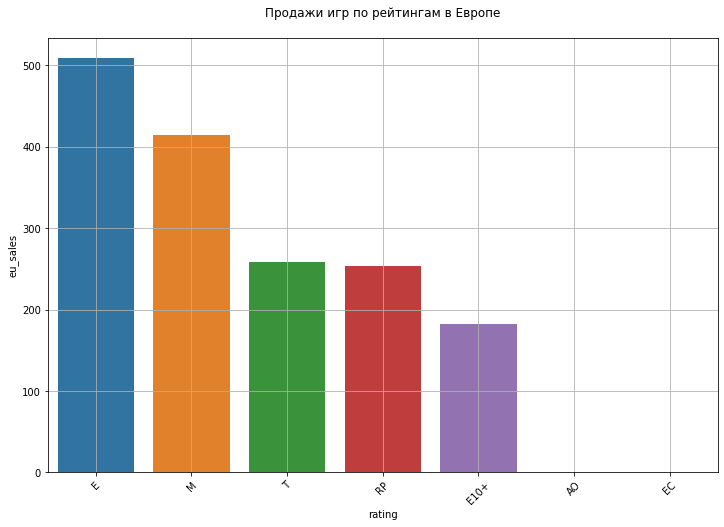

In [100]:
plt.figure(figsize=(12, 8))
sns.barplot(x='rating', 
            y='eu_sales', 
            data=eu_rating)
plt.xticks(rotation=45)
plt.title('Продажи игр по рейтингам в Европе\n')
plt.grid()

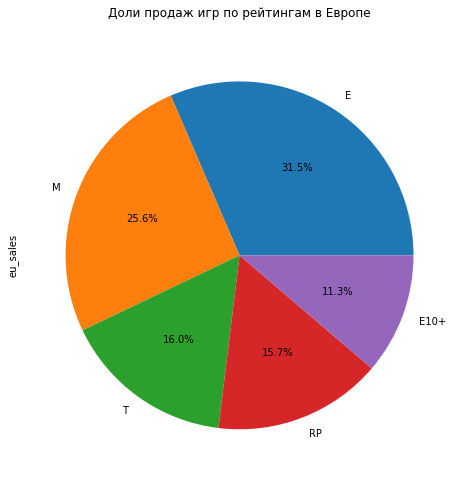

In [101]:
eu_rating.head().plot(y='eu_sales', 
                        kind='pie', 
                        labels=eu_rating.rating,
                        autopct='%.1f%%',
                        figsize=(12, 8),
                        legend=False)
plt.title('Доли продаж игр по рейтингам в Европе\n');

In [102]:
eu_rating.head()

,rating,number_of_games,eu_sales
1,E,1642,508.71
4,M,1144,414.11
6,T,1554,258.17
5,RP,1285,253.48
2,E10+,1016,181.92


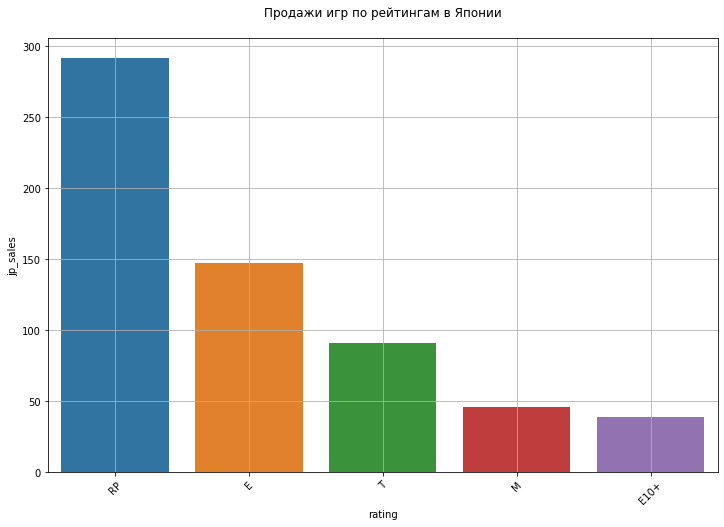

In [103]:
plt.figure(figsize=(12, 8))
sns.barplot(x='rating', 
            y='jp_sales', 
            data=jp_rating)
plt.xticks(rotation=45)
plt.title('Продажи игр по рейтингам в Японии\n')
plt.grid()

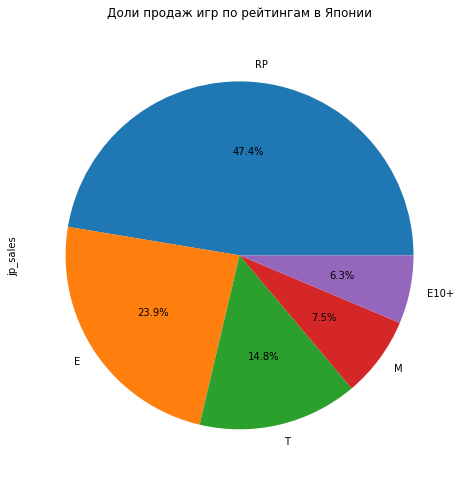

In [104]:
jp_rating.head().plot(y='jp_sales', 
                        kind='pie', 
                        labels=jp_rating.rating,
                        autopct='%.1f%%',
                        figsize=(12, 8),
                        legend=False)
plt.title('Доли продаж игр по рейтингам в Японии\n');

In [105]:
jp_rating.head()

,rating,number_of_games,jp_sales
3,RP,2585,291.65
0,E,401,147.33
4,T,681,91.32
2,M,489,46.23
1,E10+,231,39.05


<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

Обрати внимание - ты не учитываешь игры без рейтинга. В результате огромная часть игр просто выпадает из анализа. Найди способ учесть их при группировке значений по рейтингу.
    
</div>

<div class="alert alert-info" role="alert">
  Долго размышляла, но пока к какому-то адекватному решению прийти не удалось. Если бы, к примеру, это было бы значение <i>K-A</i>, можно было бы просто добавить эти строки в рассмотрение к данным с рейтингом <i>E</i> из-за того, что <i>K-A</i> - это просто устаревшее название. Возможно, в случае <i>RP</i> нужно поступить так же объяснив это тем, что <i>E</i> - универсальный рейтинг.
</div>

**Вывод:** 

**Обозначения для рейтинга:**
* **«EC»** («Early childhood») — «Для детей младшего возраста»
* **«E»** («Everyone») — «Для всех» *(первоначально **«K-A»** («Kids to Adults»))*
* **«E10+»** («Everyone 10 and older») — «Для всех от 10 лет и старше»
* **«T»** («Teen») — «Подросткам»
* **«M»** («Mature») — «Для взрослых»
* **«AO»** («Adults Only 18+») — «Только для взрослых»
* **«RP»** («Rating Pending») — «Рейтинг ожидается»

Наиболее популярными рейтингами в Северной Америке являются: 
* E (33.2%), 
* M (23.1%), 
* T (18.2%), 
* E10+ (13.1%), 
* RP (12.3%). 

Наиболее популярными рейтингами в Европе являются: 
* E (31.5%), 
* M (25.6%), 
* T (16.0%), 
* RP (15.7%),
* E10+ (11.3%).

Наиболее популярными рейтингами в Японии являются: 
* RP (47.4%),
* E (23.9%), 
* T (14.8%), 
* M (7.5%), 
* E10+ (6.3%).

Если не брать во внимание *RP*, то общего между всеми тремя регионами очень много, так что, наверное, влияния рейтинга на продаж нет. Единственное - огромная часть рейтингов в Японии отсутствует.
В Северной Америке и Европе рейтинги *E («Для всех»)* и *M («Для взрослых»)* являются наиболее популярными. В Японии, если не брать в расчет *RP*, - *E («Для всех»)* и *T («Подросткам»)*, то есть в играх заинтересована более молодая аудитория.

[вернуться в содержание](#sec)

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Портрет типичного пользователя каждого из регионов получен. Приведены все необходимые графики. Здорово, что отмечены индивидуальные особенности каждого региона. 

</div>

### <a id='sec7'>Исследование статистических показателей </a>

#### Как изменяется пользовательский рейтинг и рейтинг критиков в различных жанрах? Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения

In [106]:
# среднее, дисперсия, стандартное отклонение пользовательских оценок для различных жанров
df.groupby('genre', as_index=False)\
  .agg({'critic_score': ['mean', 'var', 'std']}, as_index=False)

genre critic_score                       
                         mean         var        std
0         Action    66.629101  201.835362  14.206877
1      Adventure    65.331269  193.787435  13.920756
2       Fighting    69.217604  203.920670  14.280079
3           Misc    66.619503  200.297473  14.152649
4       Platform    68.058350  174.603443  13.213760
5         Puzzle    67.424107  162.191524  12.735444
6         Racing    67.963612  203.012169  14.248234
7   Role-Playing    72.652646  143.996029  11.999835
8        Shooter    70.181144  211.777332  14.552571
9     Simulation    68.619318  153.997119  12.409558
10        Sports    71.968174  192.610889  13.878433
11      Strategy    72.086093  139.912829  11.828475

In [107]:
# среднее, дисперсия, стандартное отклонение оценок критиков для различных жанров
df.groupby('genre', as_index=False)\
  .agg({'user_score': ['mean', 'var', 'std']}, as_index=False)

genre user_score                    
                       mean       var       std
0         Action   7.054044  2.031747  1.425394
1      Adventure   7.133000  2.741148  1.655641
2       Fighting   7.302506  1.967431  1.402651
3           Misc   6.819362  2.393848  1.547207
4       Platform   7.301402  2.291052  1.513622
5         Puzzle   7.175000  2.309606  1.519739
6         Racing   7.036193  2.391688  1.546508
7   Role-Playing   7.619515  1.185239  1.088687
8        Shooter   7.041883  2.304582  1.518085
9     Simulation   7.134593  2.629266  1.621501
10        Sports   6.961197  2.596515  1.611370
11      Strategy   7.295177  2.670654  1.634214

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Круто, что все данные по жанрам ты собрала в единую таблицу. Так нам проще анализировать имеющиеся данные. 

</div>

In [108]:
# общая средняя оценка критиков для всех жанров
df.groupby('genre', as_index=False)\
  .agg({'critic_score': ['mean', 'var', 'std']}, as_index=False).describe()

critic_score                       
              mean         var        std
count    12.000000   12.000000  12.000000
mean     68.895910  181.828523  13.452222
std       2.380316   25.646221   0.972102
min      65.331269  139.912829  11.828475
25%      67.225355  160.142923  12.653972
50%      68.338834  193.199162  13.899594
75%      70.627902  202.129564  14.217216
max      72.652646  211.777332  14.552571

In [109]:
# общая средняя оценка пользователей для всех жанров
df.groupby('genre', as_index=False)\
  .agg({'user_score': ['mean', 'var', 'std']}, as_index=False).describe()

user_score                      
            mean        var        std
count  12.000000  12.000000  12.000000
mean    7.156156   2.292731   1.507052
std     0.206092   0.423230   0.153244
min     6.819362   1.185239   1.088687
25%     7.040461   2.226226   1.491565
50%     7.133797   2.350647   1.533124
75%     7.296733   2.604703   1.613903
max     7.619515   2.741148   1.655641

In [110]:
genres = df.genre.unique()
genres

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

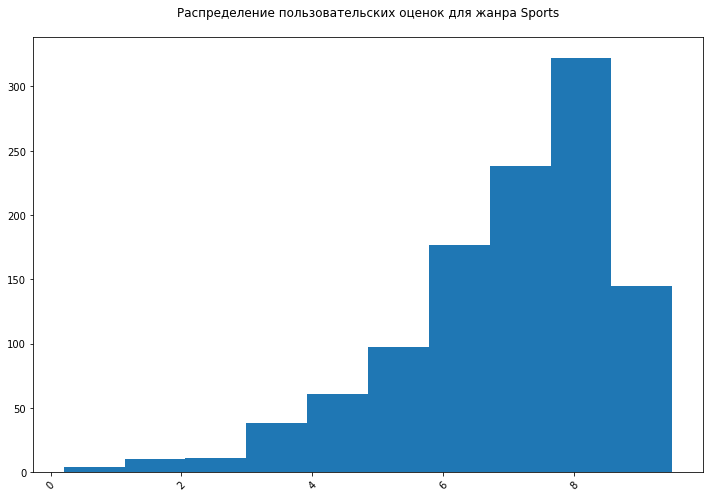

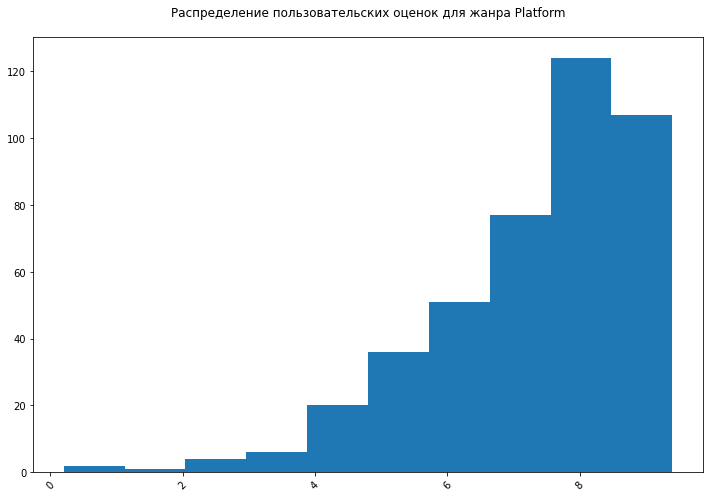

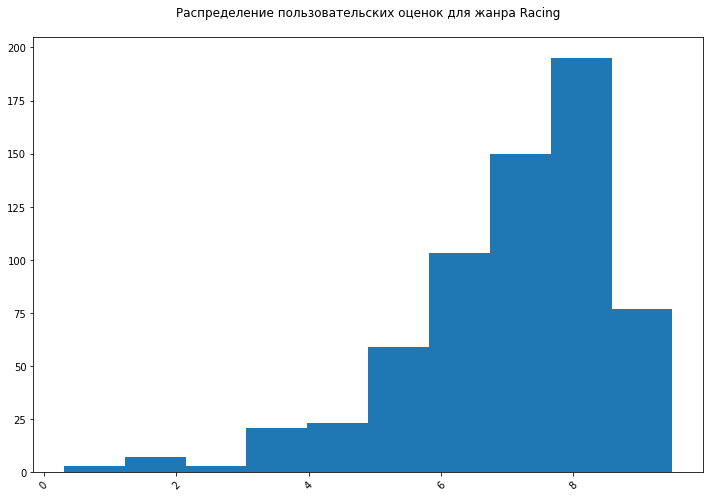

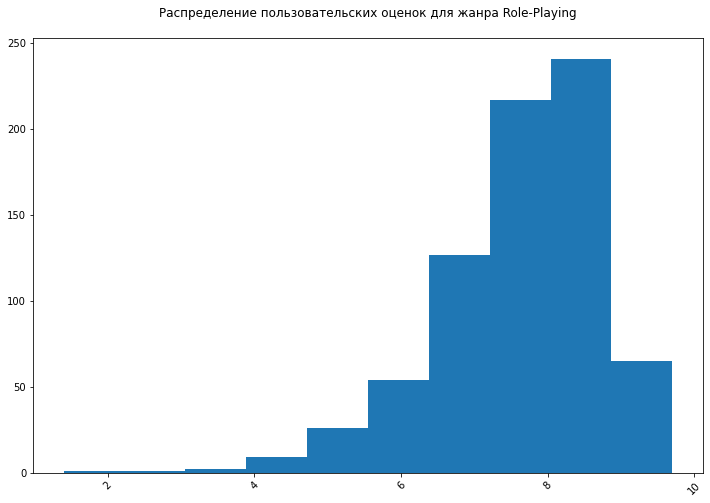

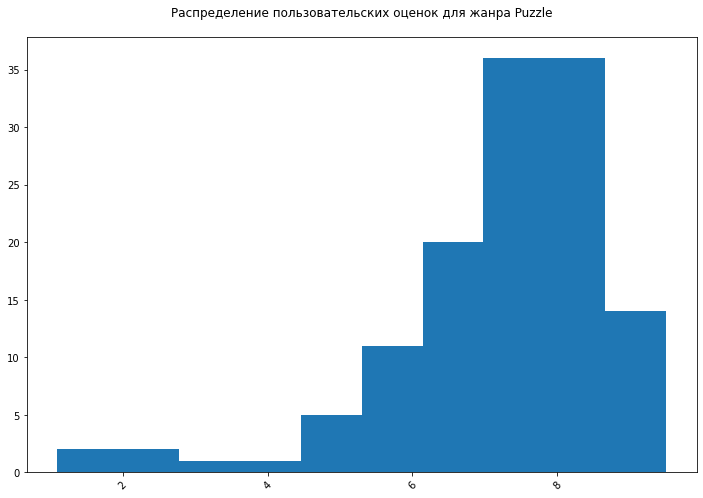

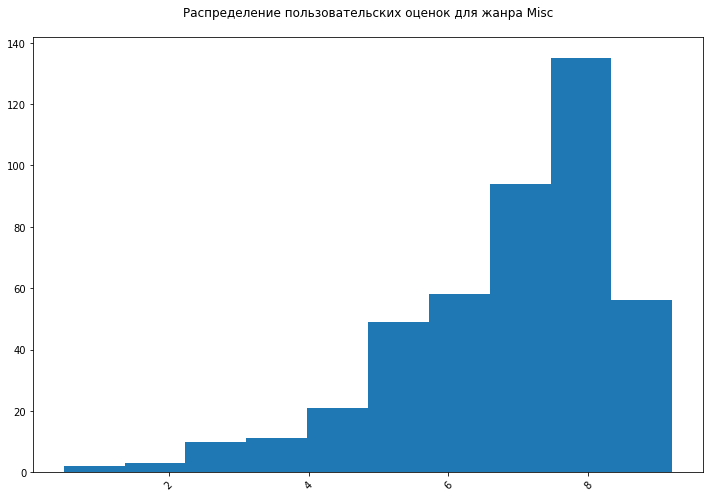

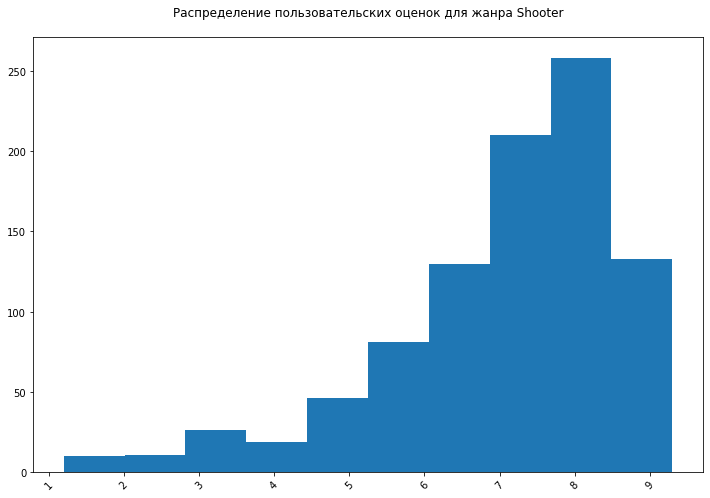

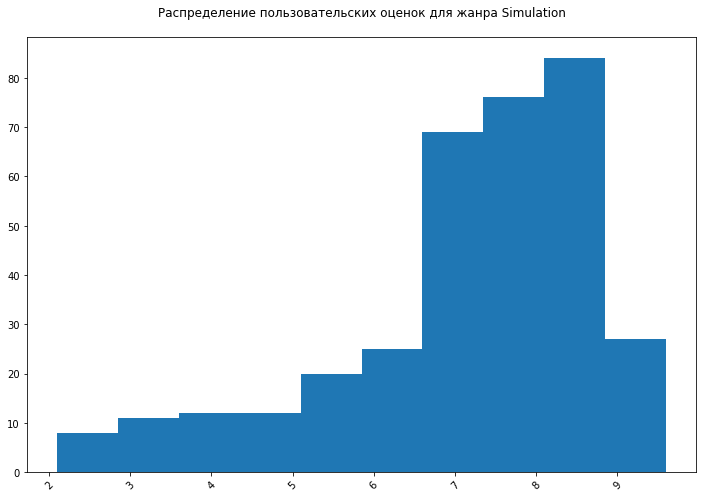

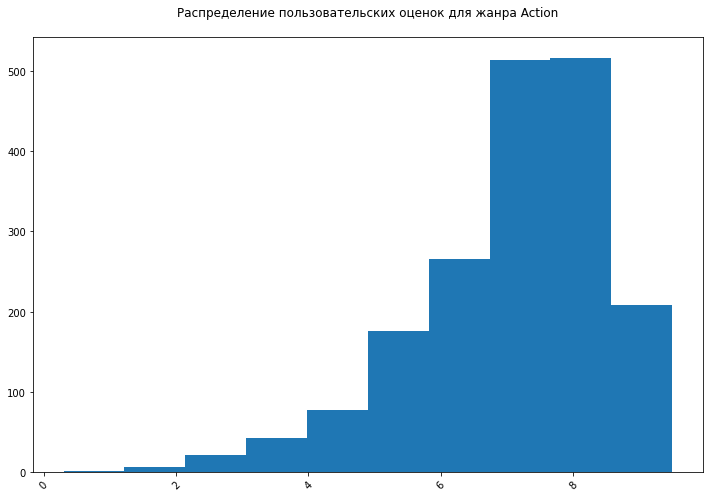

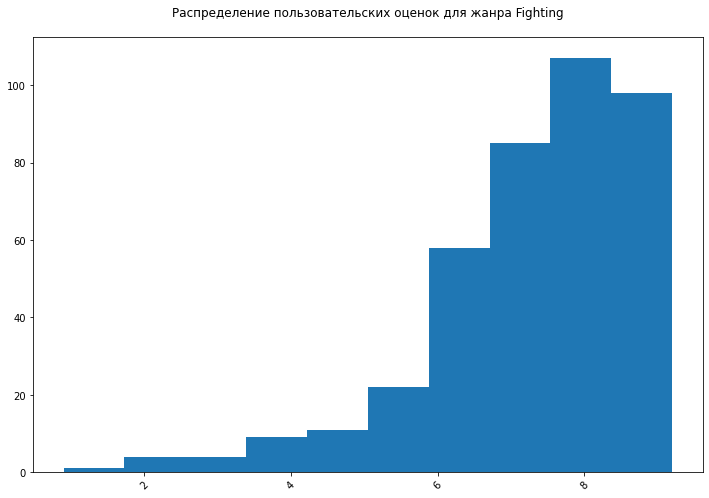

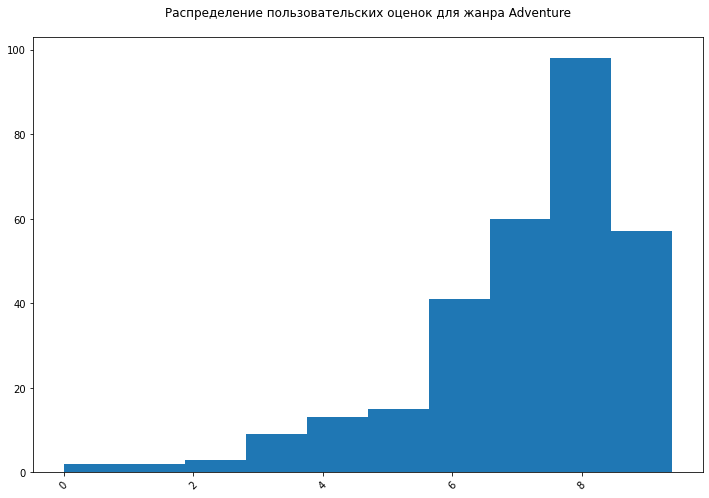

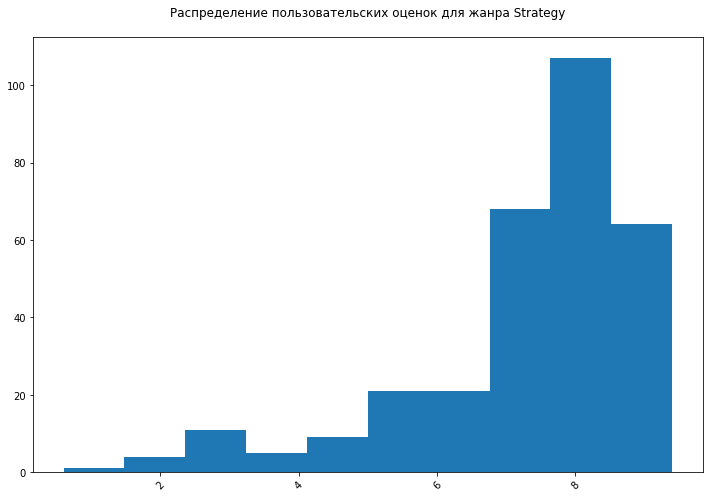

In [111]:
for genre in genres:
    plt.figure(figsize=(12, 8))
    # sns.distplot(df.query('genre == @genre').user_score.fillna(-1))
    df.query('genre == @genre').user_score.hist()
    plt.xticks(rotation=45)
    plt.title(f'Распределение пользовательских оценок для жанра {genre}\n')
    plt.grid()
    plt.show()

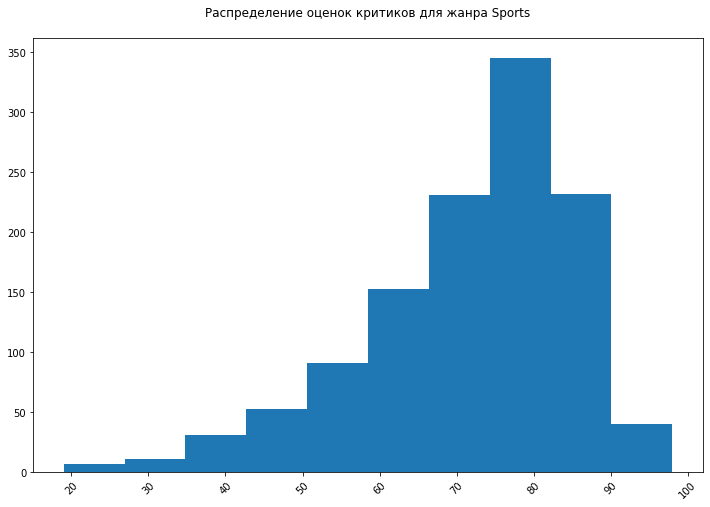

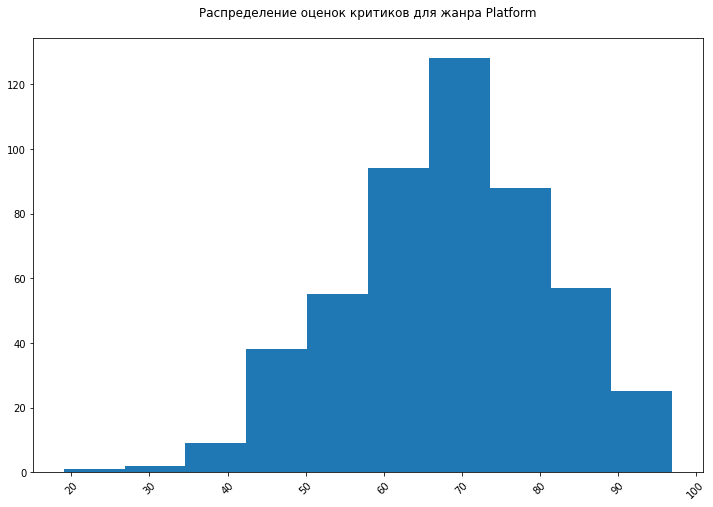

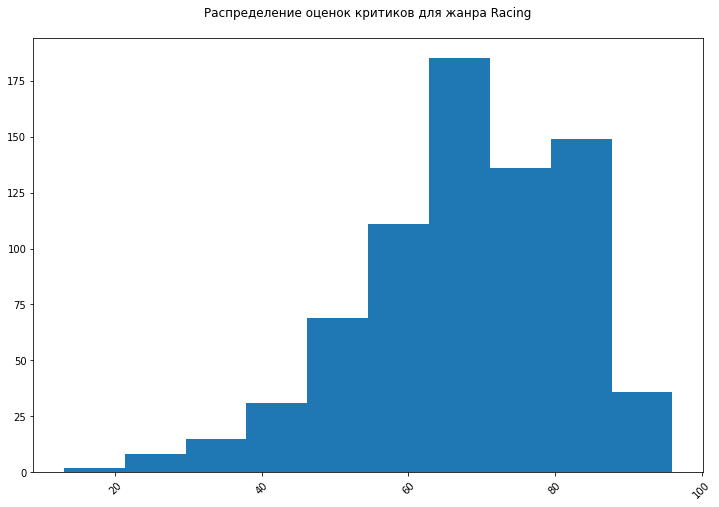

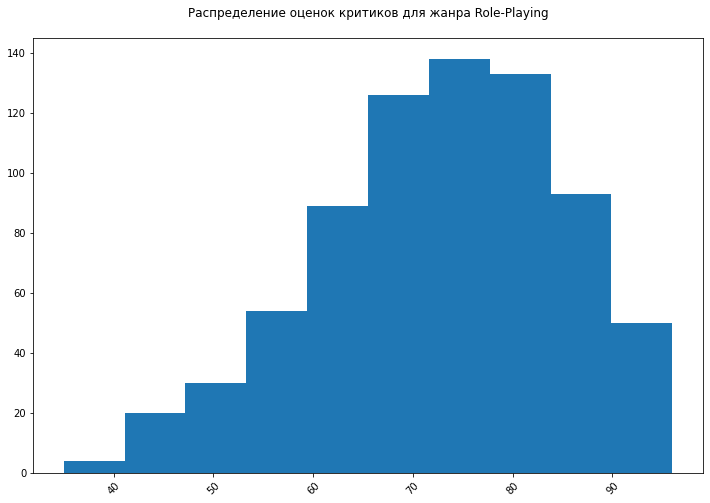

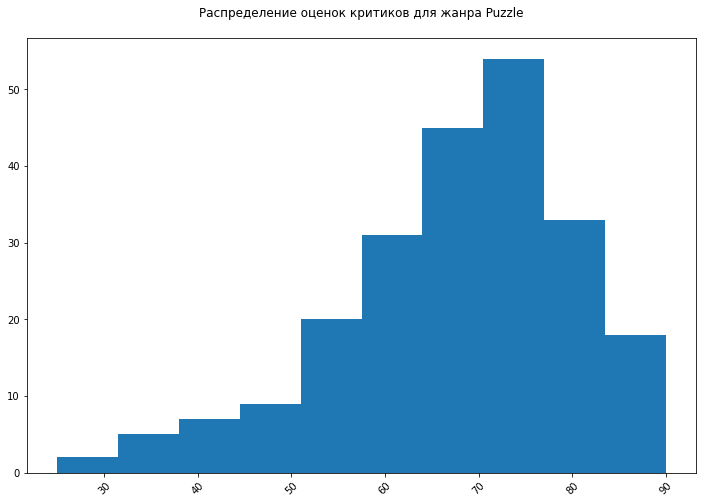

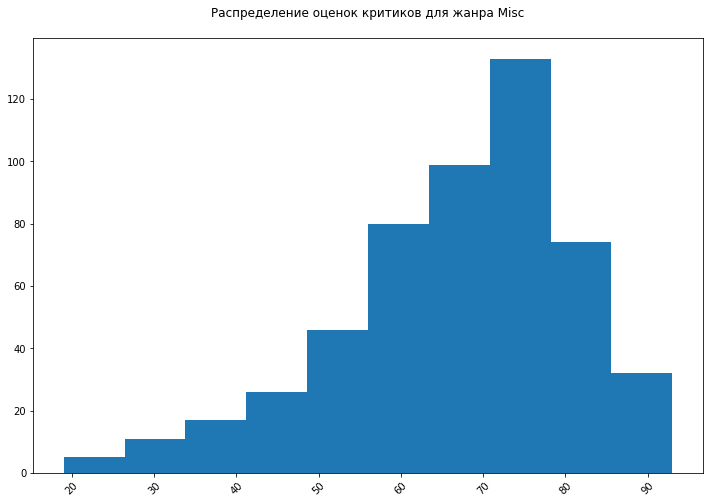

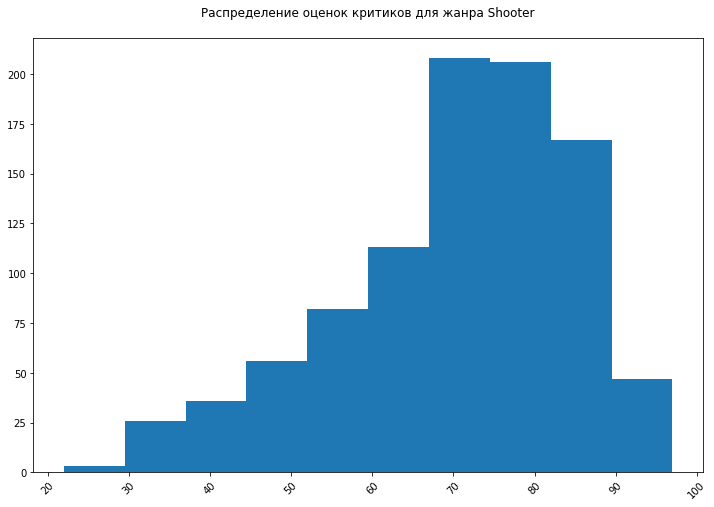

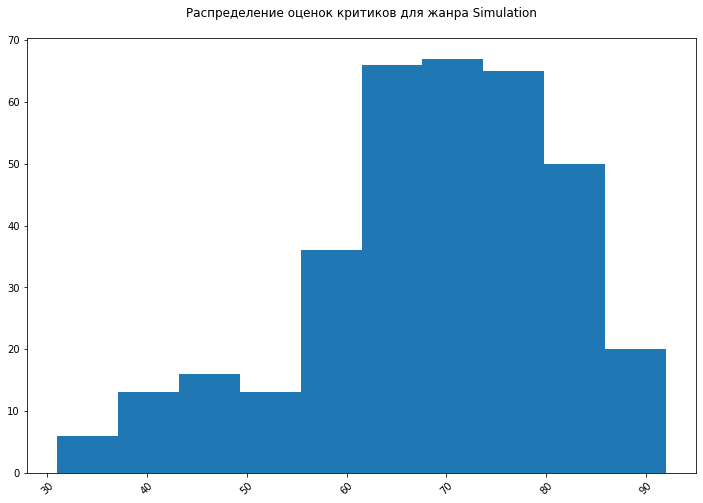

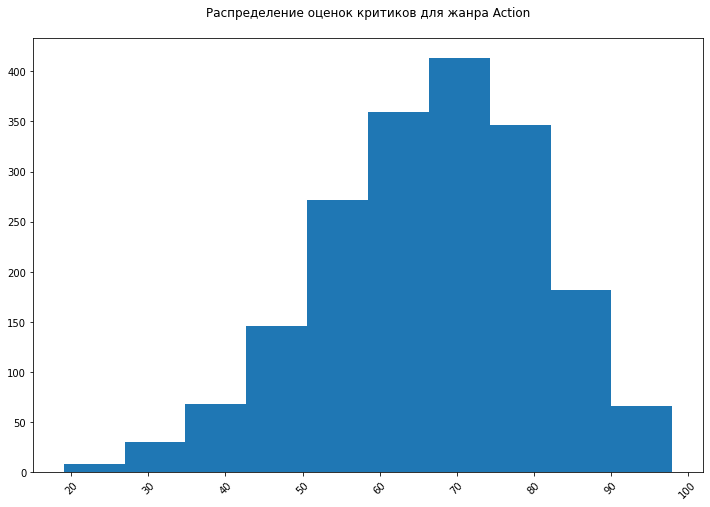

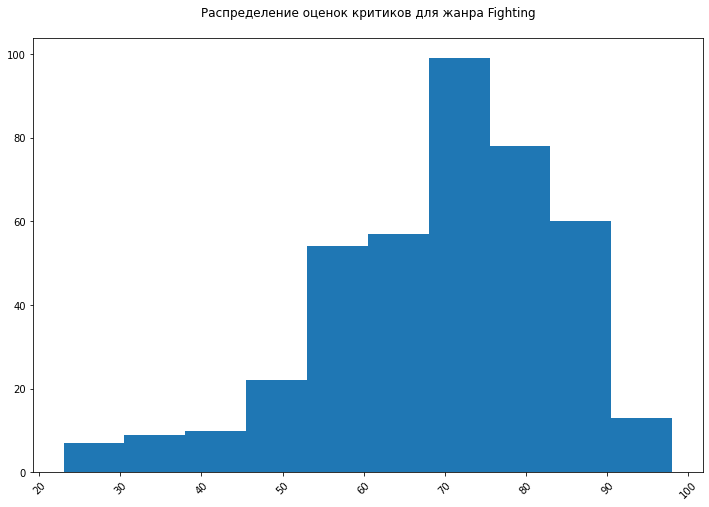

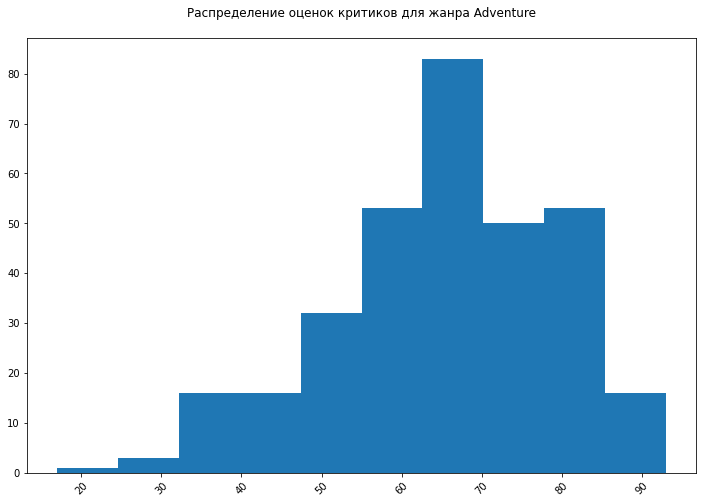

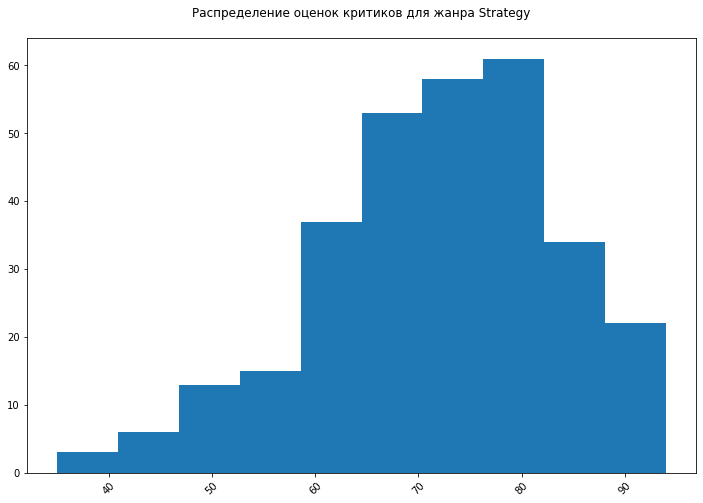

In [112]:
for genre in genres:
    plt.figure(figsize=(12, 8))
    # sns.distplot(df.query('genre == @genre').user_score.fillna(-1))
    df.query('genre == @genre').critic_score.hist()
    plt.xticks(rotation=45)
    plt.title(f'Распределение оценок критиков для жанра {genre}\n')
    plt.grid()
    plt.show()

В основном все гистограммы распределения оценок пользователей скошены вправо. Гистограммы распределения оценок критиков имеют нормальное распределение, так как более симметричны.

**Вывод: НУЖНО ДОБАВИТЬ МЕДИАНУ!!!**

Среднее по оценкам критиков по всех жанрах - 68.90 / 100, по пользовательским оценкам - 7.16 / 10.

Максимальную оценку критиков (в среднем 72.65) заслужил жанр *Role-Playing*, максимальную оценку пользователей (7.62) получил тот же жанр.

Минимальной оценки критиков (в среднем 65.33) удостоился жанр *Adventure*, минимальную оценку пользователей же (6.82) - *Misc*.

[вернуться в содержание](#sec)

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Анализ проведен. Как думаешь, почему для большинства жанров мы имеем скошенные распределения?

</div>

### <a id='sec8'> Проверка гипотез </a>

**1. Нулевая гипотеза $H_0$:**

Средние пользовательские рейтинги платформ *Xbox One* и *PC* равны между собой.

**Альтернативная гипотеза $H_1$:**

Средние пользовательские рейтинги платформ *Xbox One* и *PC* не равны между собой.

Для проверки гипотез воспользуемся **t-критерием Стьюдента**, так как здесь идет речь о сравнении средних в независимых выборках при неизвестных дисперсиях.

Пороговое значение: $\alpha = 0.05$.

In [113]:
# формирование выборок
xone = df.query('platform == "XOne"').user_score
pc = df.query('platform == "PC"').user_score

In [114]:
xone.describe()

count    182.000000
mean       6.521429
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64

In [115]:
pc.describe()

count    770.000000
mean       7.062468
std        1.529963
min        1.400000
25%        6.200000
50%        7.500000
75%        8.200000
max        9.300000
Name: user_score, dtype: float64

Дисперсии двух выборок примерно равны, но все равно стоит провести 2 теста: один - **Welch's t-test** (дисперсии неизвестны, различные), другой - **two-sample t-test** (дисперсии неизвестны, равны).

In [116]:
# задание уровня значимости
alpha = 0.05

**Доверительный интервал для разности средних двух выборок** (если покрывает 0, то, скорее всего, мат.ожидания одинаковые):

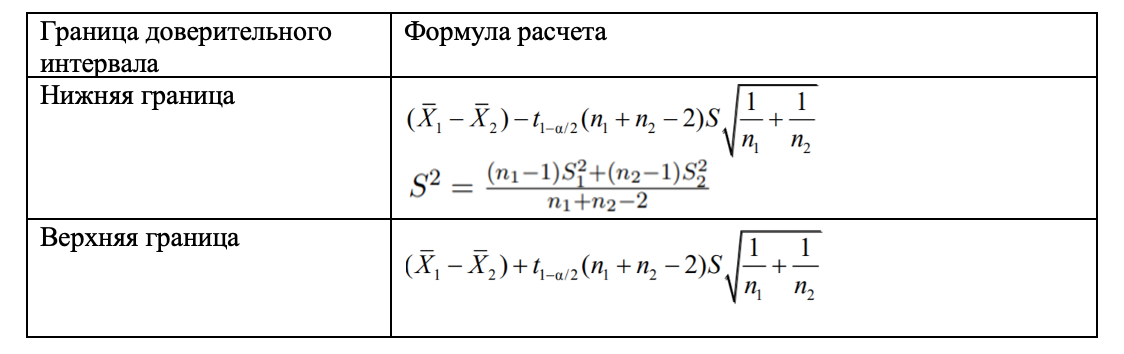

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Круто, что ты знаешь о доверительном интервале и умеешь его рассчитывать. 

</div>

In [117]:
s = (((len(xone) - 1) * xone.var() + \
      (len(pc) - 1) * pc.var()) / \
      (len(xone) + len(pc) - 2)) ** 0.5
interval = sps.t.ppf(1 - alpha / 2, len(xone) + len(pc) - 2) * \
           s * (1 / len(xone) + 1 / len(pc)) ** 0.5
print('Нижняя граница:', (xone.mean() - pc.mean()) - interval)
print('Верхняя граница:', (xone.mean() - pc.mean()) + interval)

Нижняя граница: -0.7508429378459767
Верхняя граница: -0.33123498423197684


In [118]:
# two-sample t-test

stat, pvalue = sps.ttest_ind(xone, pc, equal_var=True, nan_policy='omit')
print(f'Выборочное значение статистики критерия: {stat}\np-value: {pvalue}')

if pvalue > alpha:
    print('Принимаем гипотезу H_0')
else:
    print('Отвергаем гипотезу H_0')

Выборочное значение статистики критерия: -4.368333815003015
p-value: 1.3896435533545967e-05
Отвергаем гипотезу H_0


In [119]:
# Welch's t-test

stat, pvalue = sps.ttest_ind(xone, pc, equal_var=False, nan_policy='omit')
print(f'Выборочное значение статистики критерия: {stat}\np-value: {pvalue}')

if pvalue > alpha:
    print('Принимаем гипотезу H_0')
else:
    print('Отвергаем гипотезу H_0')

Выборочное значение статистики критерия: -4.653422798410772
p-value: 4.9350723601835005e-06
Отвергаем гипотезу H_0


In [120]:
xone_mean = xone.mean()
pc_mean = pc.mean()

In [121]:
# среднее значение пользовательского рейтинга для XOne 
xone_mean

6.52142857142857

In [122]:
# среднее значение пользовательского рейтинга для PC 
pc_mean

7.062467532467546

**Вывод:** гипотезу о том, что средние пользовательские рейтинги платформ *Xbox One* (среднее равно приблизительно 6.52) и *PC* (среднее равно приблизительно 7.06) одинаковые, отклоняем.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Гипотезы сформулированы и проверены верно.

</div>

<div class="alert alert-info" role="alert">
  Решила здесь тоже подкорректировать формулировки гипотез с учетом знака, что было упомянуто в Вашем комментарии ниже.
</div>

**2. Нулевая гипотеза $H_0$:**

Средние пользовательские рейтинги жанров *Action (англ. «действие»)* и *Sports (англ. «виды спорта»)* равны между собой.

**Альтернативная гипотеза $H_1$:**

Средние пользовательские рейтинги жанров *Action (англ. «действие»)* и *Sports (англ. «виды спорта»)* не равны между собой.

Для проверки гипотез воспользуемся **t-критерием Стьюдента**, так как здесь идет речь о сравнении средних в независимых выборках при неизвестных дисперсиях.

Пороговое значение: $\alpha = 0.05$.

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

Нулевая гипотеза всегда формулируется с учетом знака равенства. Учти это и исправь формулировки. 

</div>

<div class="alert alert-info" role="alert">
  Сделано.
</div>

In [123]:
# формирование выборок
action = df.query('genre == "Action"').user_score
sports = df.query('genre == "Sports"').user_score

In [124]:
action.describe()

count    1830.000000
mean        7.054044
std         1.425394
min         0.300000
25%         6.300000
50%         7.400000
75%         8.100000
max         9.500000
Name: user_score, dtype: float64

In [125]:
sports.describe()

count    1103.000000
mean        6.961197
std         1.611370
min         0.200000
25%         6.100000
50%         7.400000
75%         8.100000
max         9.500000
Name: user_score, dtype: float64

Дисперсии двух выборок примерно равны, но все равно стоит провести 2 теста: один - **Welch's t-test** (дисперсии неизвестны, различные), другой - **two-sample t-test** (дисперсии неизвестны, равны).

In [126]:
# задание уровня значимости
alpha = 0.05

In [127]:
s = (((len(action) - 1) * action.var() + \
      (len(sports) - 1) * sports.var()) / \
      (len(action) + len(sports) - 2)) ** 0.5
interval = sps.t.ppf(1 - alpha / 2, len(action) + len(sports) - 2) * \
           s * (1 / len(action) + 1 / len(sports)) ** 0.5
print('Нижняя граница:', (action.mean() - sports.mean()) - interval)
print('Верхняя граница:', (action.mean() - sports.mean()) + interval)

Нижняя граница: 0.013554436407365117
Верхняя граница: 0.17213952293846488


In [128]:
# two-sample t-test

stat, pvalue = sps.ttest_ind(action, sports, equal_var=True, nan_policy='omit')
print(f'Выборочное значение статистики критерия: {stat}\np-value: {pvalue}')

if pvalue > alpha:
    print('Принимаем гипотезу H_0')
else:
    print('Отвергаем гипотезу H_0')

Выборочное значение статистики критерия: 1.6259419280500702
p-value: 0.10406951359035752
Принимаем гипотезу H_0


In [129]:
# Welch's t-test

stat, pvalue = sps.ttest_ind(action, sports, equal_var=False, nan_policy='omit')
print(f'Выборочное значение статистики критерия: {stat}\np-value: {pvalue}')

if pvalue > alpha:
    print('Принимаем гипотезу H_0')
else:
    print('Отвергаем гипотезу H_0')

Выборочное значение статистики критерия: 1.5774679163335246
p-value: 0.11483818791510716
Принимаем гипотезу H_0


<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

При получении pvalue меньше alpha, мы отвергаем нулевую гипотезу. Две ошибки, приводящие к верному результату, остаются ошибками. 

</div>

<div class="alert alert-info" role="alert">
  Сделано.
</div>

In [130]:
action_mean = action.mean()
sports_mean = sports.mean()

In [131]:
# среднее значение пользовательского рейтинга для Action 
action_mean

7.054043715846988

In [132]:
# среднее значение пользовательского рейтинга для Sports 
sports_mean

6.961196736174073

**Вывод:** гипотезу о том, что средние пользовательские рейтинги жанров *Action* (среднее равно приблизительно 7.05) и *Sports* (среднее равно приблизительно 6.96) одинаковые, принимаем.

[вернуться в содержание](#sec)

### <a id='sec9'> Общий вывод </a>

#### <a id='sec91'> Выявленные закономерности </a>
* Самая популярная платформа за все время - *PS2*.
* У популярных платформ период популярности составляет приблизительно 10-12 лет.
* В ближайшие 10 лет ожидается период популярности платформ *PS4, XOne, 3DS*, получивших свою популярность на момент 2016 года.
* Сумма продаж у *PS4* на момент 2016 года наибольшая.
* Оценки критиков и пользователей довольно слабое влияние оказывают на сумму продаж различных платформ.
* По общей сумме продаж в мире лидируют жанры: *Action, Sports, Shooter.*
* Самые прибыльные жанры (по относительной оценке продаж) - *Shooter, Platform, Sports.*


* Необходимо учитывать, какие платформы популярны и прибыльны в рамках каждого отдельного региона, так как рынок Северной Америки и Европы, как выяснилось, примерно похожи, а Япония имеет значимые отличия.

  Самой прибыльной платформой в Северной Америке является *X360*, в Европе - *PS3*, в Японии - DS.

  Пользователи первых двух регионов предпочитают жанры *Action* и *Sports* в то время как японским пользователям больше нравится *Role-Playing*. 
  
  При этом рейтинги во всех трех регионах особого влияния не оказывают, хотя в Японии к играм большой интерес проявляет более молодая аудитория (но стоит не забывать, что в этом регионе было много пропущенных значений в графе рейтинга).
  
  
* Пользователи склонны ставить более высокие оценки, чем критики.

  Среднее по оценкам критиков по всех жанрах - 68.90 / 100, по пользовательским оценкам - 7.16 / 10.

  Максимальную оценку критиков (в среднем 72.65) заслужил жанр *Role-Playing*, максимальную оценку пользователей (7.62) получил тот же жанр.

  Минимальной оценки критиков (в среднем 65.33) удостоился жанр *Adventure*, минимальную оценку пользователей же (6.82) - *Misc.*
  
  
* Как было выяснено в результате проверки гипотез, делаем выводы: 

  * Cредние пользовательские рейтинги платформ *Xbox One* и *PC* различные.
  
    То есть делать вывод, что пользователи похожим образом отноятся к этим категориям игр, нельзя.

  * Средние пользовательские рейтинги жанров *Action* и *Sports* можно считать равными между собой.
  
    В данном случае можно считать, что пользователи относятся к играм этих жанров похожим образом. 
    
[вернуться в содержание](#sec)

#### <a id='sec92'> Планирование рекламных кампаний на будущее </a>

Таким образом, если делать ставки на потенциально популярный продукт, то стоит вкладываться в игры жанров *Action, Sports, Shooter* (причем выгоднее вкладываться в *Sports* и *Shooter*, так как их продажи растут быстрее при меньшем количестве проданных игр) как лидирующих по общей сумме продаж (при этом покрывающих Европу и Северную Америку, мировых гигантов), а также в платформы *PS4, XOne, 3DS*, захватывающие мир своей популярностью.

[вернуться в содержание](#sec)

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Выводы описаны грамотно. Приведены ответы на главные вопросы проекта. В выводах можно приводить полученные ранее значения, правильно. Здорово, что по каждому пункту работы приведен вывод.     

</div>

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>

Если тебе нравится тема визуализации, то можешь изучить другие методы библиотеки seaborn. Она позволяет строить довольно презентабельные графики. Здорово, что ты вообще используешь данную библиотеку. 

Ты проделала большую работу, молодец! Критических замечаний немного. Однако с ними важно поработать. Также есть достаточное число желтых комментариев. Думаю, исправить их тебе не составит труда. Жду твою работу :)

</div>